# Plot Figures of the Thesis (real-world data)

This Notebook provides all the code for plotting the figures of the M.Sc. Thesis (Real-World Data Analysis) that were not already created during the analysis.

In [1]:
# imports
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import os
import re
import math
import matplotlib.gridspec as gridspec

from plot_functions import *

In [2]:
# folder directories
ts_data_dir = "MScThesis/explore/data/final_datasets/"
alr_data_dir = "MScThesis/Python/ALR_transformation/ALR_transformed_data/"

output_dir_glv = "glv_output/"
output_dir_clv = "clv_output/"
output_dir_deepmod = "deepmod_output/output_LRZ_Cluster_10-27_structured/"
output_dir_node = "NODE_output/"

plot_dir = "plot_output/"


# load standard matplotlib colors
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

### list datasets

In [3]:
# compositional datasets
datasets_comp = [
    'donorA',
    'donorB',
    'male',
    'female', 
    'Silverman_all',
    # 'Silverman_daily_ALR',
    'Silverman_hourly',
    'Bucci'
    ]

# all datasets
datasets = [
    'miaSim',
    '3DLV',
    'VanderPol',
    'VanderPol_noise_0-1',
    'VanderPol_noise_0-2',
    'VanderPol_noise_0-5',
    'VanderPol_noise_1',
    'donorA',
    'donorB',
    'male',
    'female', 
    'Silverman_all',
    'Silverman_daily_ALR',
    'Silverman_hourly',
    'Bucci'
    'BioTIME_study_339_Genus_10',
    'BioTIME_study_339_Species_15',
    'BioTIME_study_363_Genus_10',
    'BioTIME_study_363_Species_15',
    'BioTIME_study_39_Genus_10', 
    'BioTIME_study_39_Species_15',
    'BioTIME_study_478_Genus_10',
    'BioTIME_study_478_Species_15',
    'Ushio'
    ]

# Plots

## Heatmap cLV all datasets

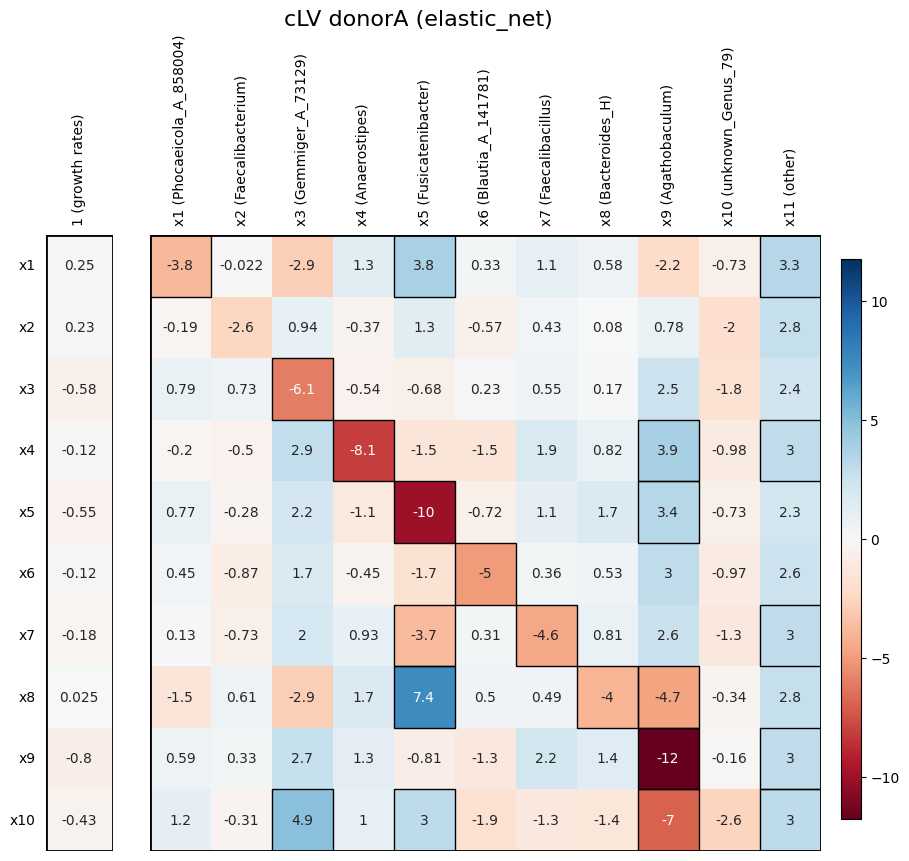

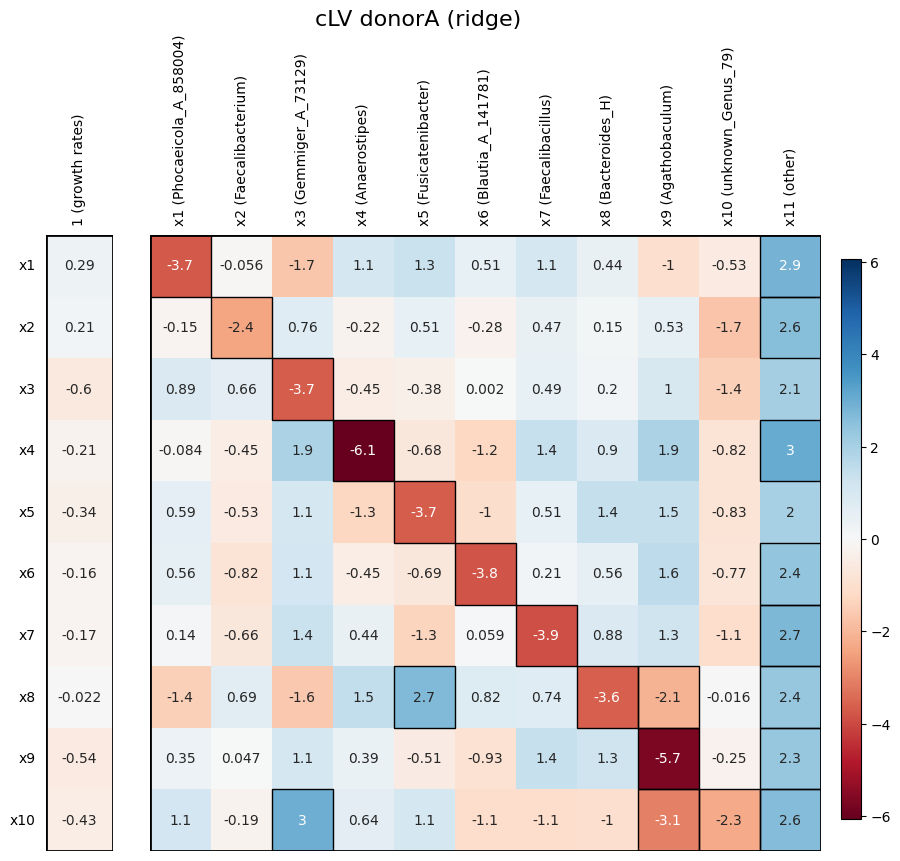

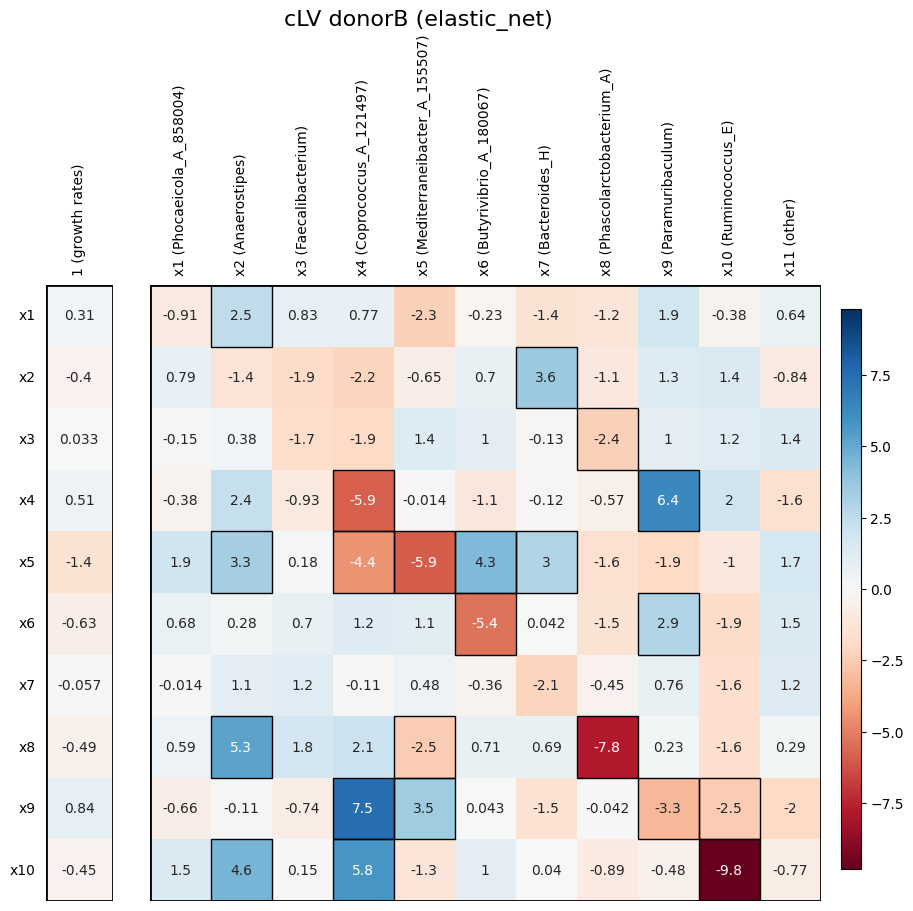

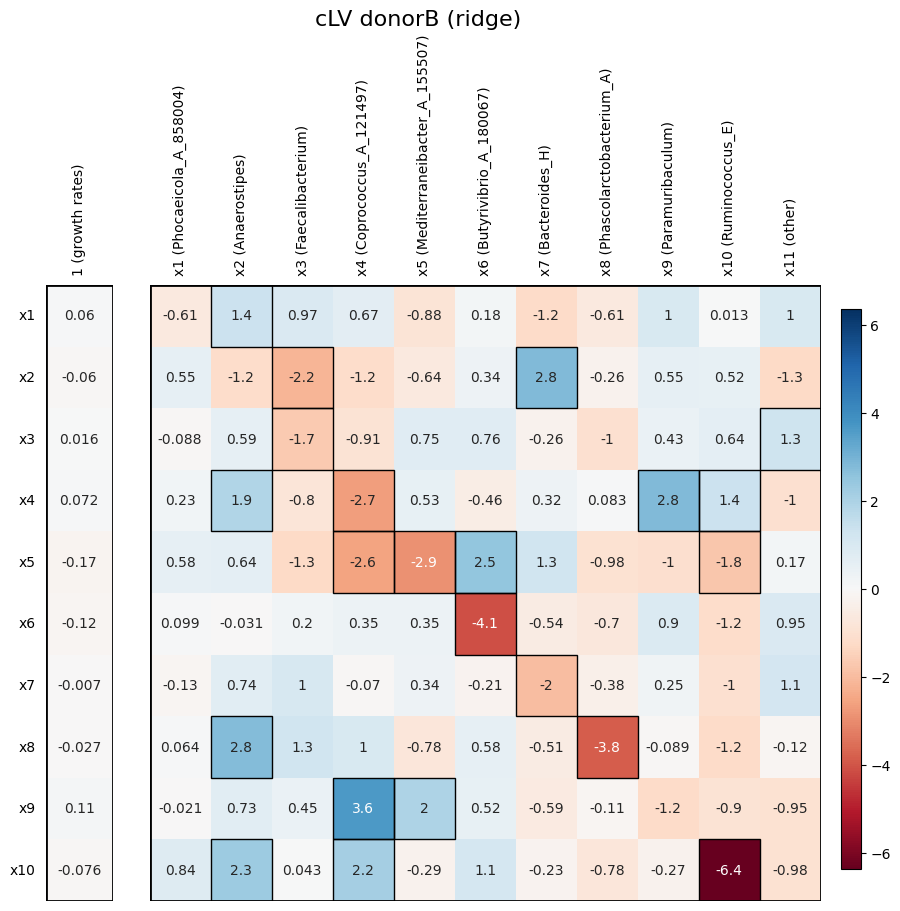

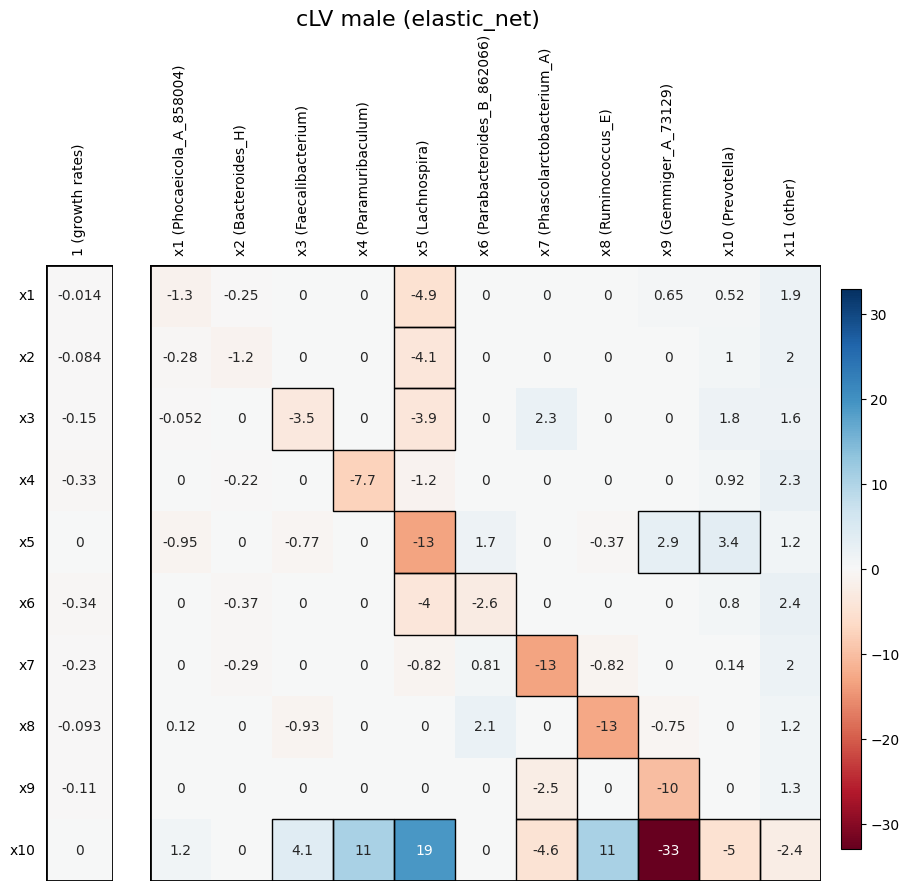

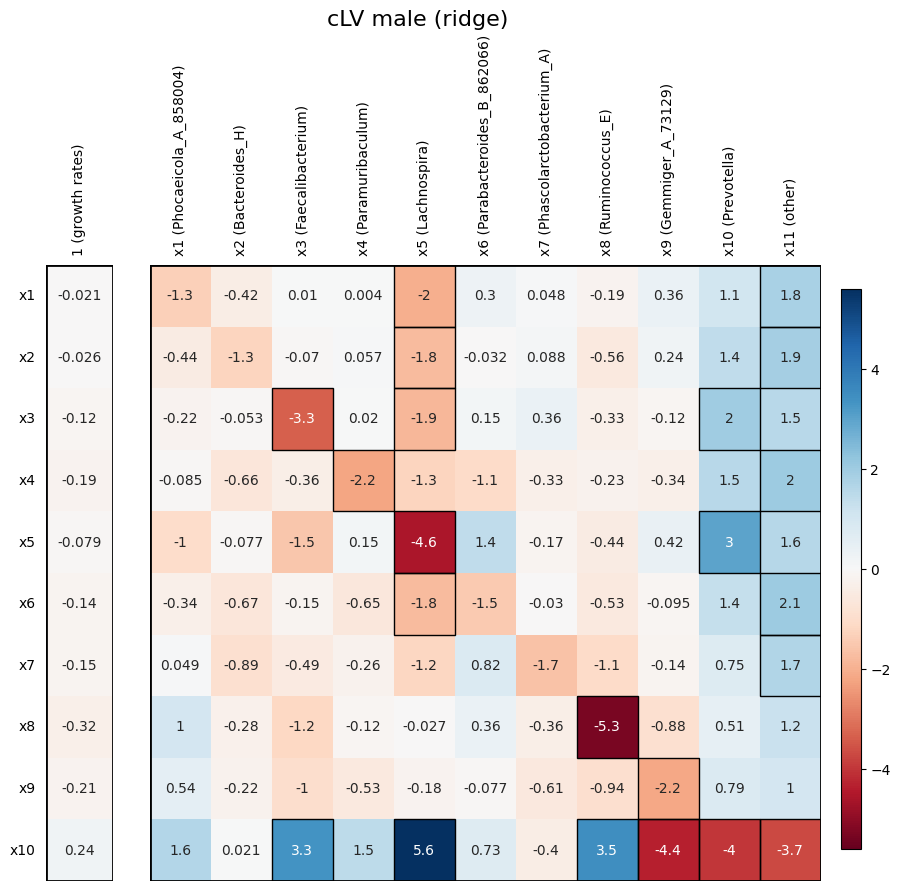

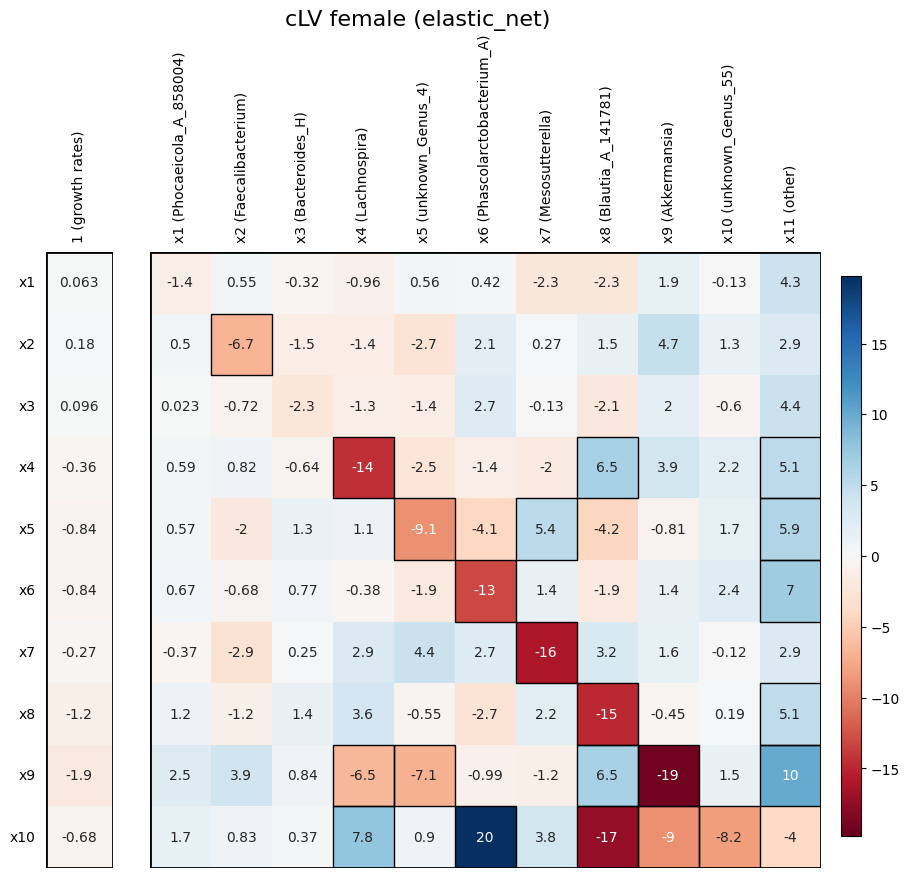

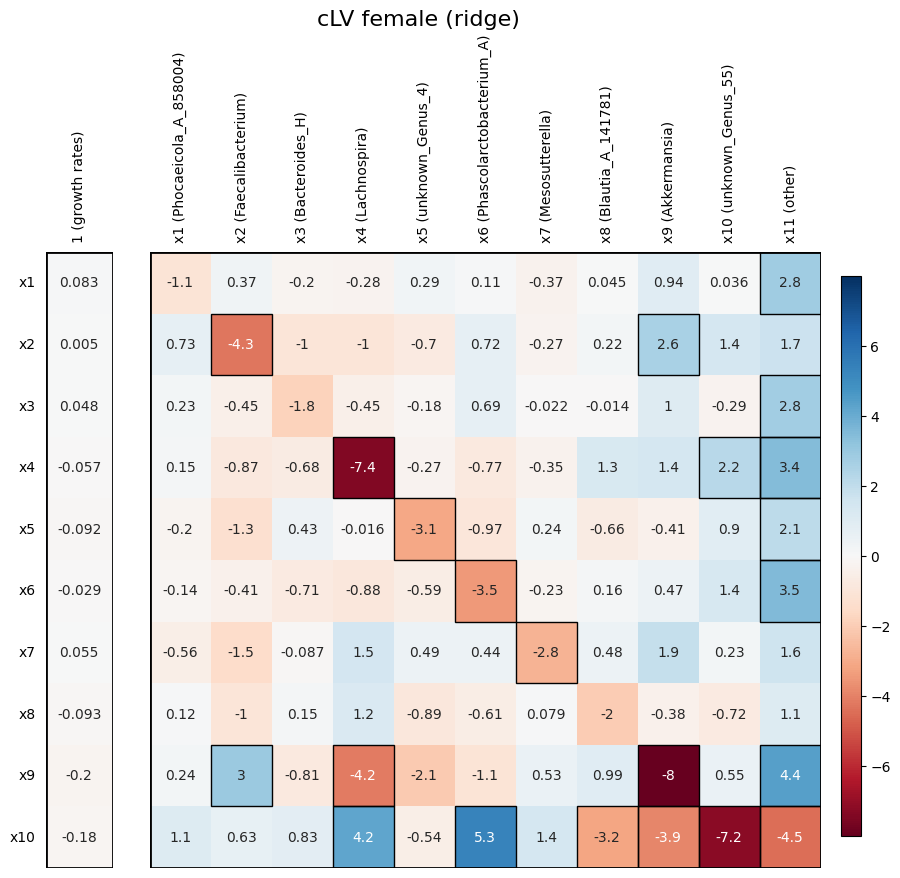

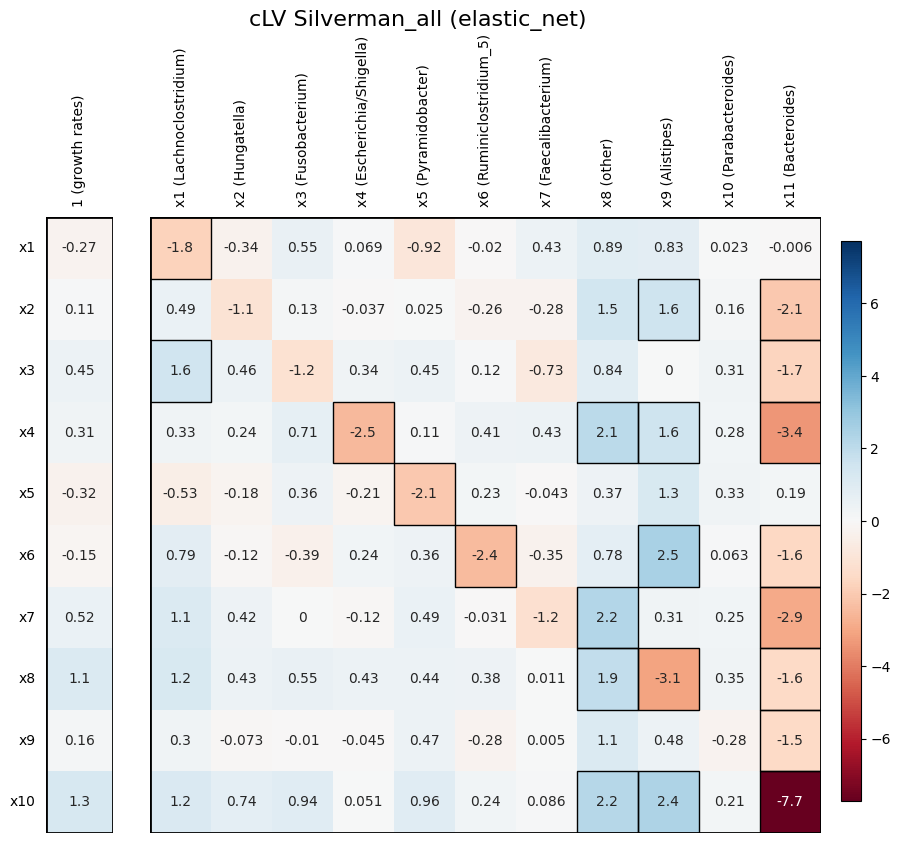

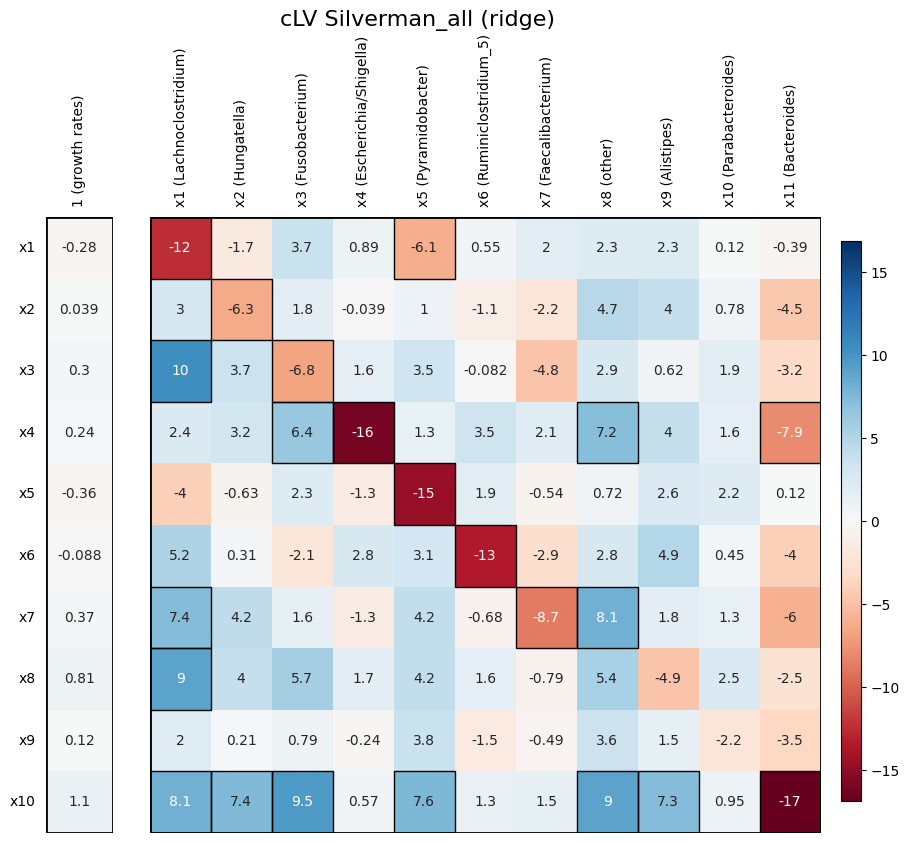

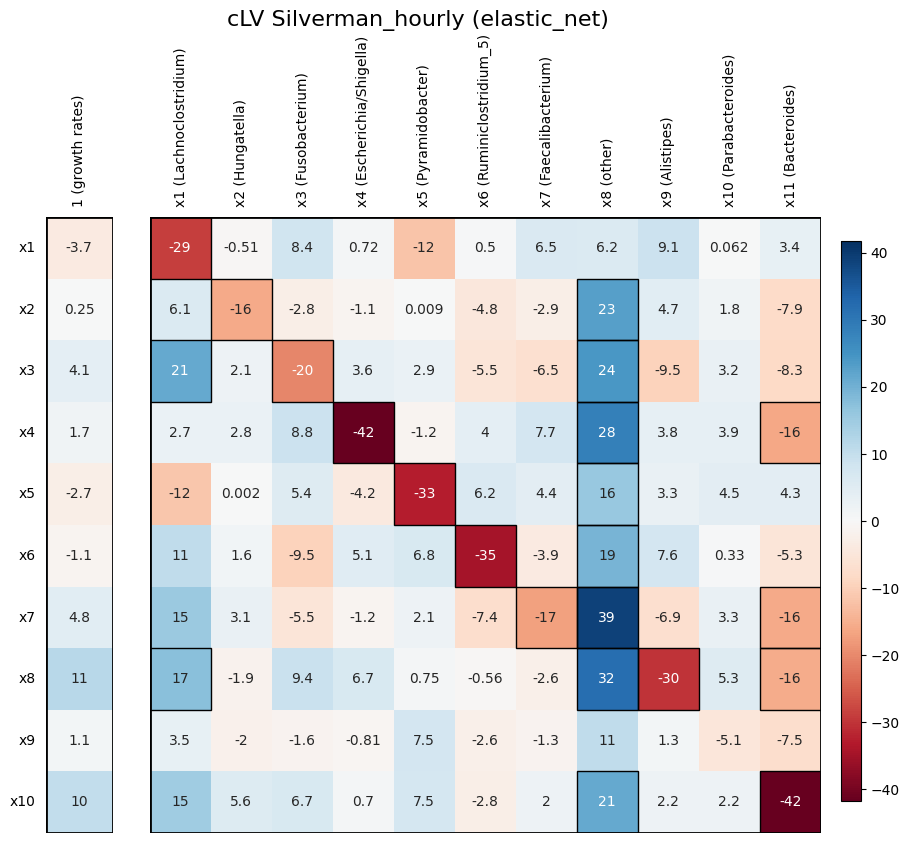

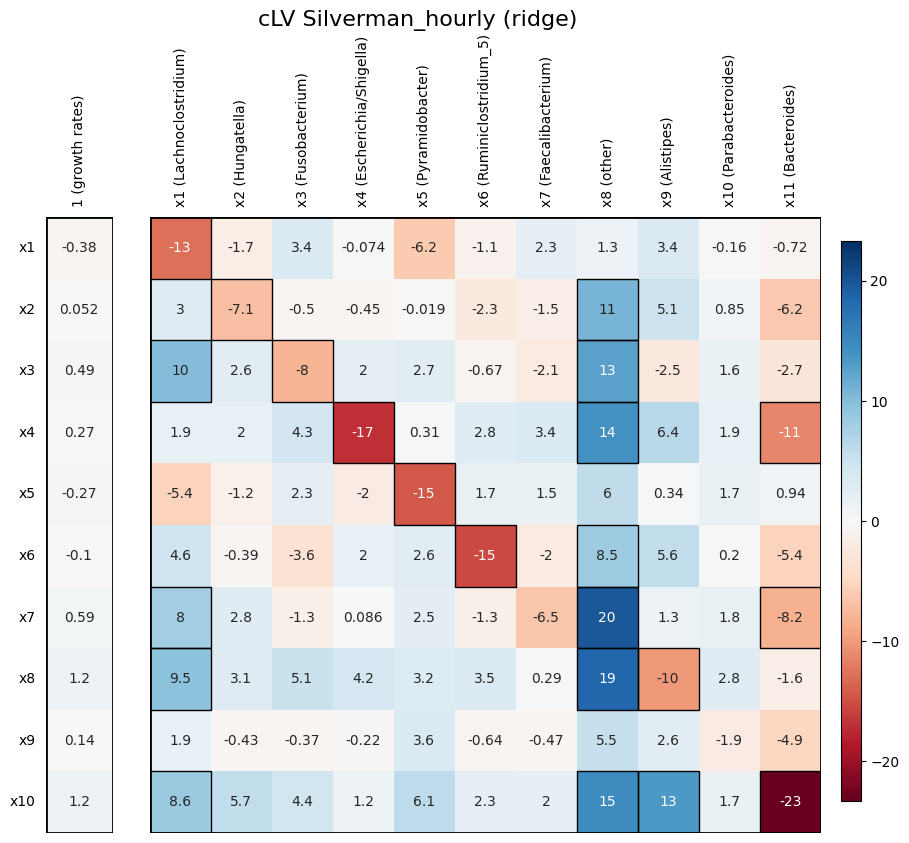

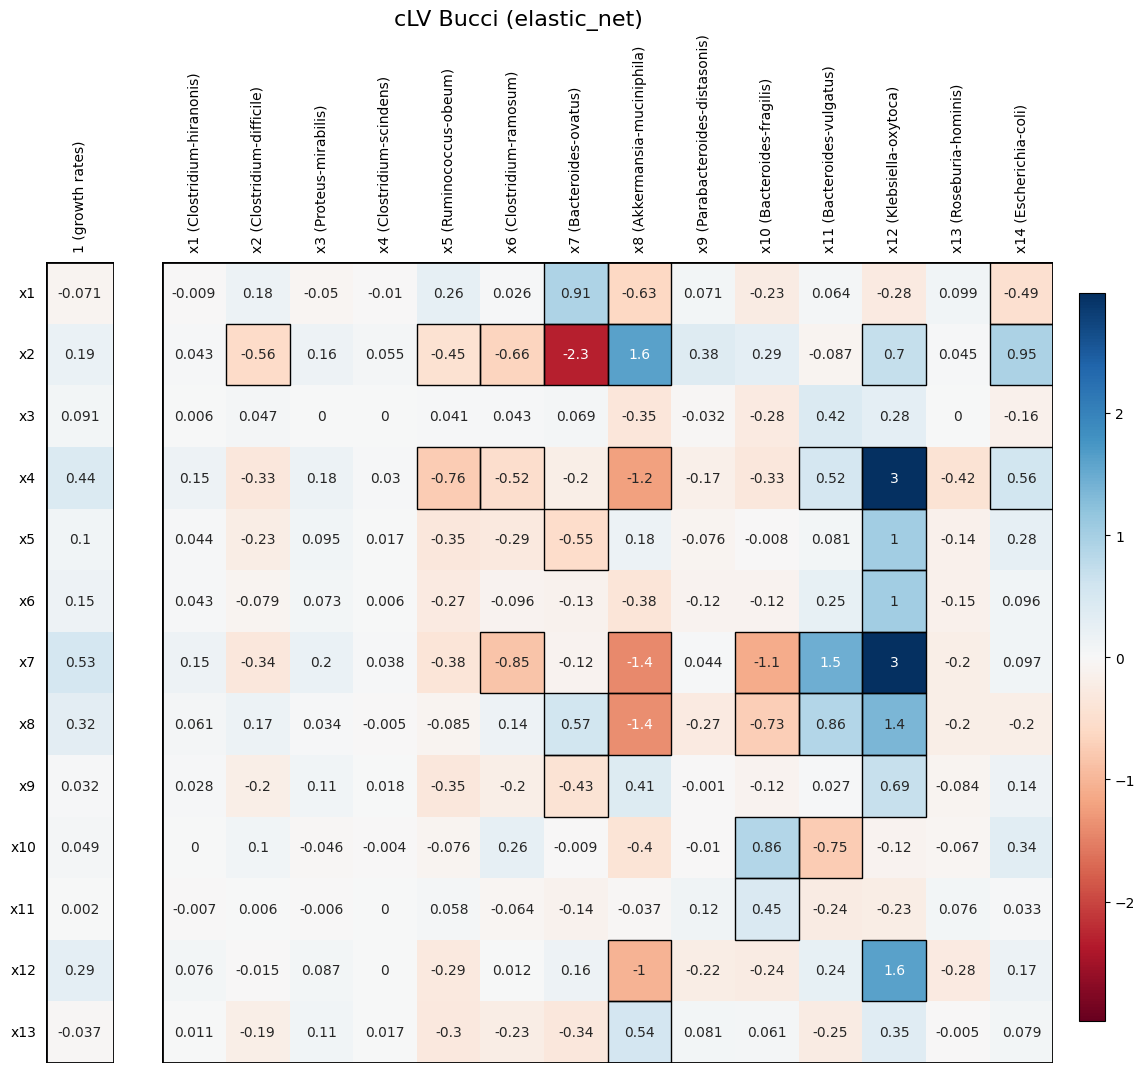

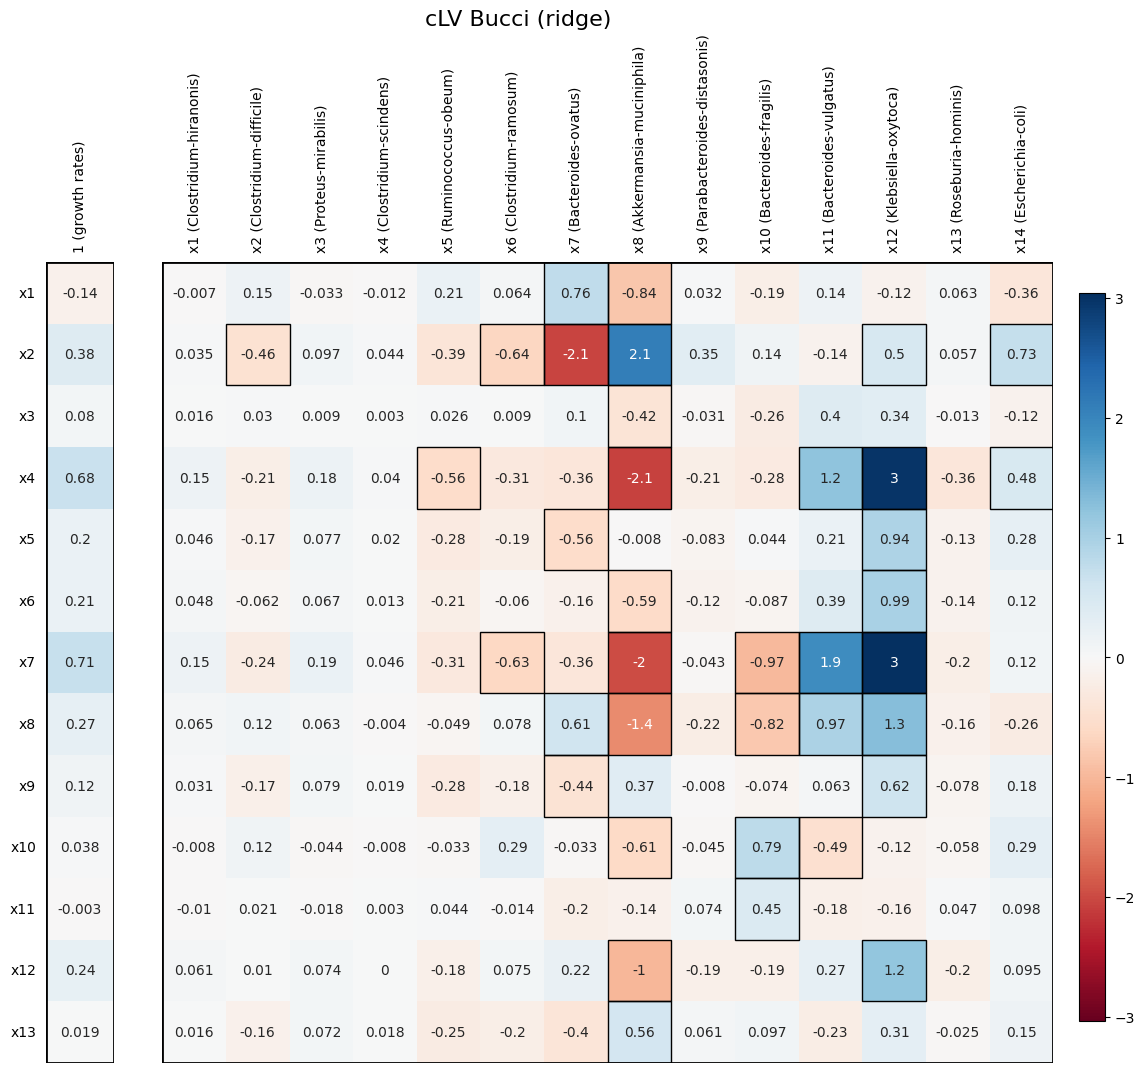

In [4]:
for dataset in datasets_comp:
    for Mat in ["elastic_net", "ridge"]: 

        out_dir = output_dir_clv + "output_" + dataset

        # get number of taxa
        df = pd.read_csv(f'{out_dir}/output_{dataset}_run_05/clv_{Mat}_A.csv', index_col=0)
        n_taxa = len(df.index)

        # # get list of available runs for the given dataset
        # runs = []
        # for file in [s for s in os.listdir(out_dir) if dataset in s]:
        #     m = re.search(r"run_(\d{2})", file)
        #     if m:
        #         runs.append(m.group(1))
        runs = [10]

        # number of available runs
        n_runs = len(runs)

        # check if runs for these specifications are available
        if n_runs > 0:
            
            model_coeffs_A_all = []
            model_coeffs_g_all = []

            for run in runs:
                out_run = out_dir + "/output_" + dataset + f"_run_{run}"
                if os.path.exists(f"{out_run}/clv_{Mat}_A.csv"):
                    model_coeffs_A_tmp = pd.read_csv(f"{out_run}/clv_{Mat}_A.csv", index_col=[0])
                    model_coeffs_A_all.append(model_coeffs_A_tmp.to_numpy())
                    model_coeffs_g_tmp = pd.read_csv(f"{out_run}/clv_{Mat}_g.csv", index_col=[0])
                    model_coeffs_g_all.append(model_coeffs_g_tmp.to_numpy())
            names = pd.read_csv(f"{out_run}/ts_clv_{Mat}_prediction_{dataset}.csv", header=0).columns[1:]

        if len(model_coeffs_A_all) > 0:
            # calculate mean over all coeff matrices
            mean_array_A = np.mean(model_coeffs_A_all, axis=0)
            mean_array_g = np.mean(model_coeffs_g_all, axis=0)
            # and save as csv file
            pd.DataFrame(mean_array_A).to_csv(f'{out_dir}/clv_{Mat}_A_mean.csv', index=False)
            pd.DataFrame(mean_array_g).to_csv(f'{out_dir}/clv_{Mat}_g_mean.csv', index=False)

            # make plot
            # plot_heatmap(matrix_A = np.around(mean_array_A, 2), ax = ax, fig=fig, 
            #             title = f"{dataset}, {Mat}", Mat=Mat, rec_per = 20)
            plot_heatmaps(mean_array_A, mean_array_g, n_taxa, title=f"cLV {dataset} ({Mat})", colnames = names)
            
            # save plot
            plt.savefig(f'{plot_dir}/{dataset}_clv_{Mat}_heatmaps_A_g_mean.pdf',
                        bbox_inches='tight', dpi = 300)

## Plot fits DeepMoD female example run

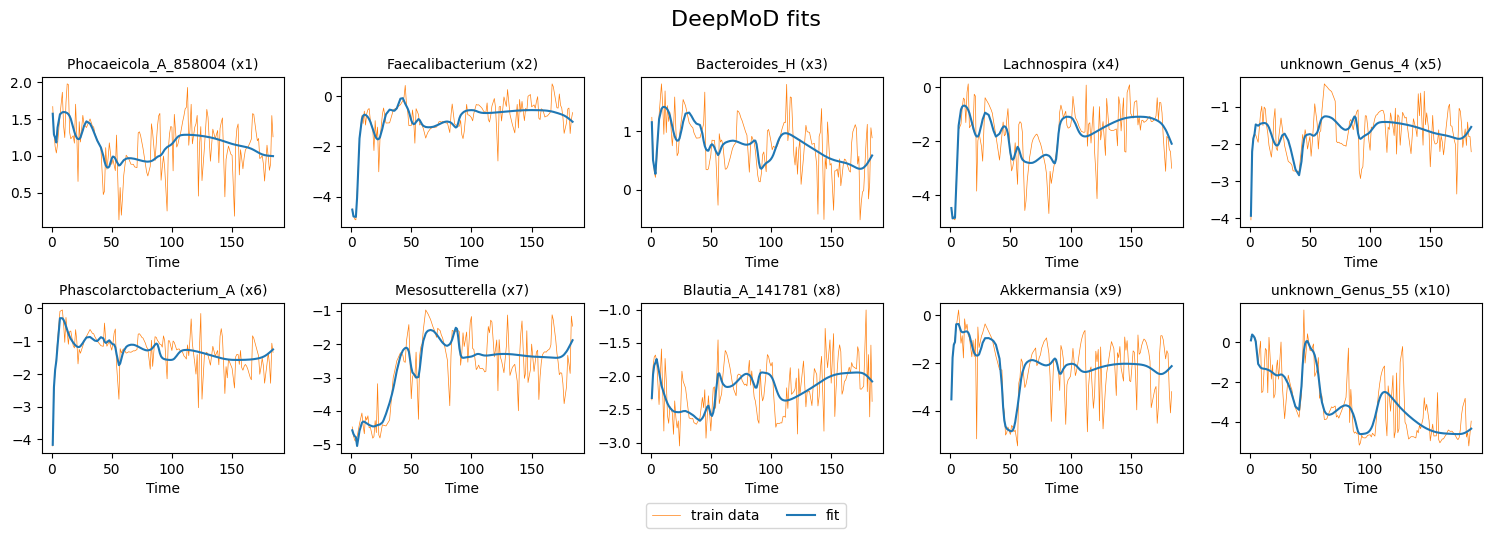

In [5]:
out_dir = output_dir_deepmod + "humanTS_Genus10/ALR_female/int2/"
n_taxa = 10

# set plot dimensions
n_col = 5
n_row = 2

# make plot
fig, axs = plt.subplots(n_row, n_col)
fig.set_figwidth(3*n_col)
fig.set_figheight(2.5*n_row)
fig.suptitle(f"DeepMoD fits",
             size=16, y=1.0)

run = "output_batch_10-23_humanTS_female_test_run01_female_Genus10_ALR_3_50_th0-01_int2"

plot_path_tmp = f"{out_dir}{run}/Data/"

names = pd.read_csv(f"{plot_path_tmp}Names.csv", header=[0])
names = names["Names"]

for taxon in range(n_taxa):
    if os.path.exists(f"{plot_path_tmp}/prediction_x{taxon+1}.csv"):
        # read data files
        df_pred = pd.read_csv(f"{plot_path_tmp}prediction_x{taxon+1}.csv", header=[0])
        df_data_train = pd.read_csv(f"{plot_path_tmp}data_train_x{taxon+1}.csv", header=[0])
        # convert files to numpy array
        data_train = np.array(df_data_train)
        pred = np.array(df_pred)
        # make plot
        axs[int(taxon/n_col), (taxon % n_col)].plot(data_train[:,1], data_train[:,0], label = "train data",  linewidth=0.5, color = colors[1])
        axs[int(taxon/n_col), (taxon % n_col)].plot(pred[:,1], pred[:,0], label = "fit")
        axs[int(taxon/n_col), (taxon % n_col)].set_title(f"{names[taxon]} (x{taxon+1})", size = 10)
        axs[int(taxon/n_col), (taxon % n_col)].set_xlabel("Time")

fig.tight_layout(pad=1.0)  

# add overall legend below the plots
handles, labels = [], []
for ax in axs.ravel():
    for h, l in zip(*ax.get_legend_handles_labels()):
        if l not in labels:
            handles.append(h)
            labels.append(l)
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol = 2, fontsize = 10)

# save plots in one file
plt.savefig(f'{plot_dir}/DeepMoD_fits_female_example_run.pdf',
            bbox_inches='tight', dpi = 300)

## Plot fits DeepMoD female three example runs (libraries int1, in2, in3)

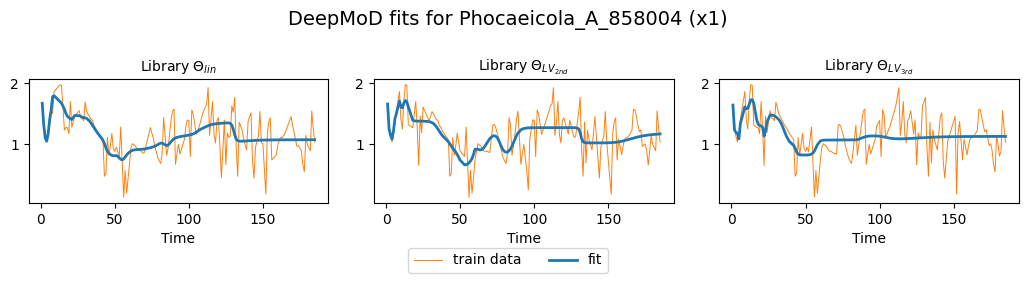

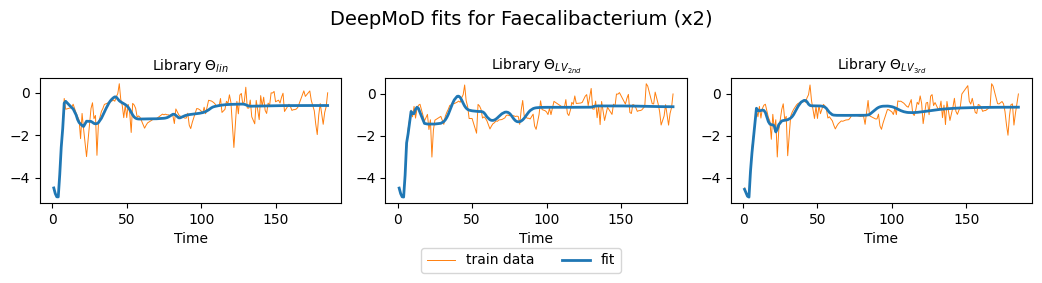

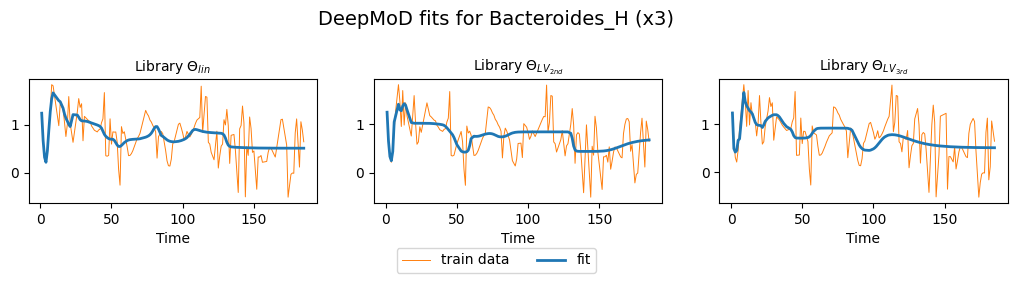

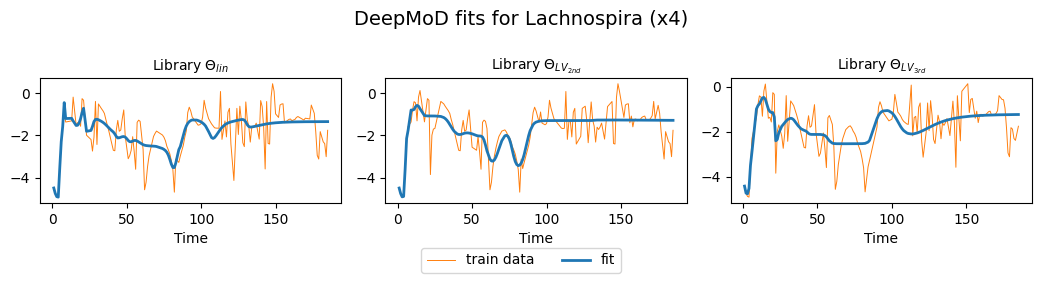

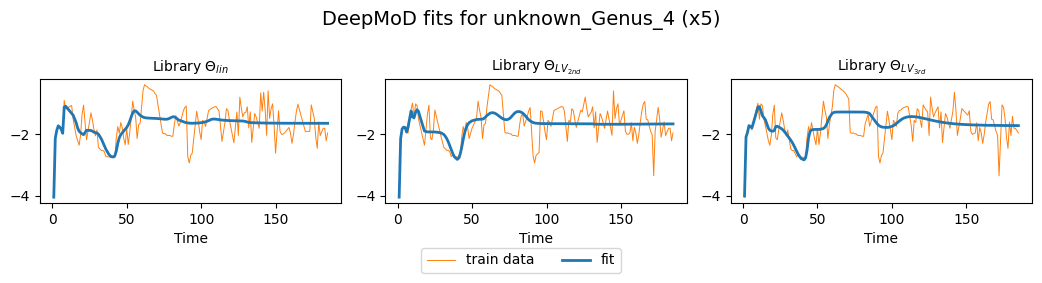

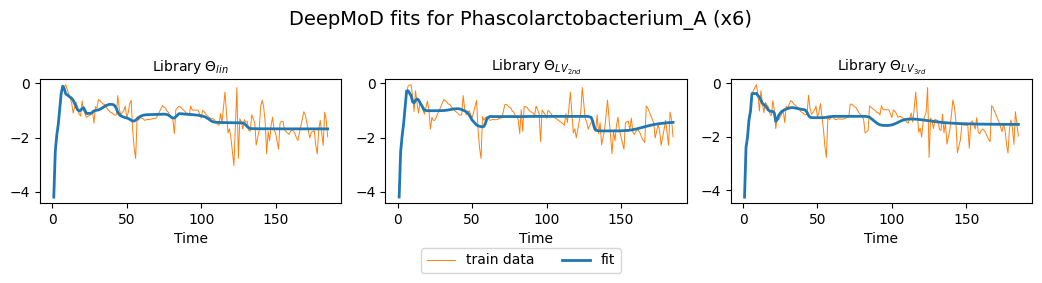

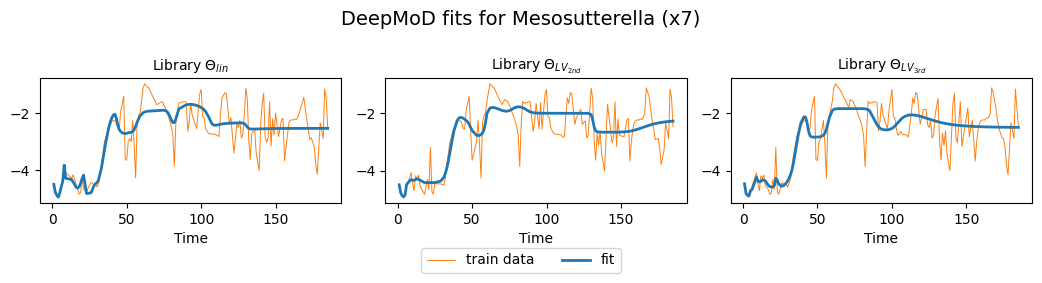

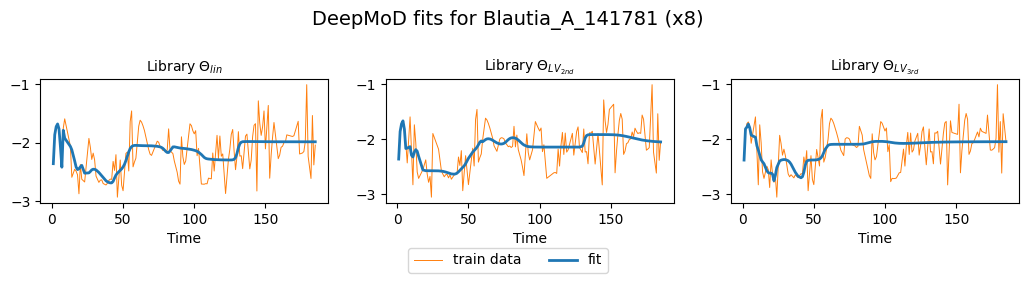

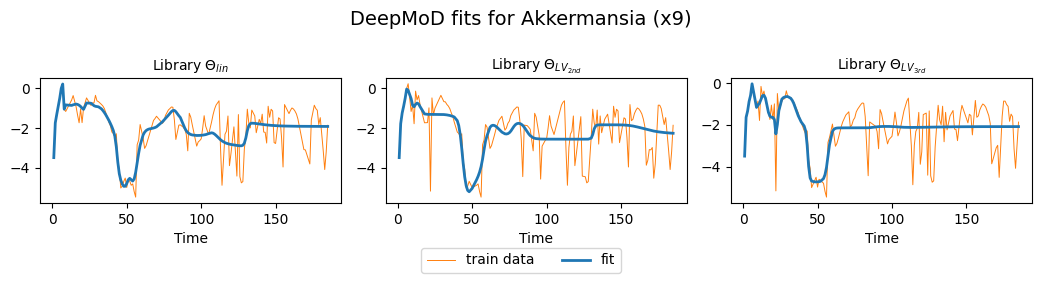

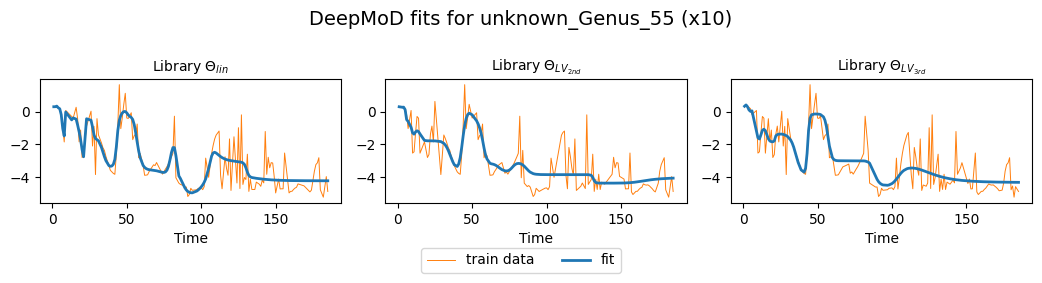

In [6]:
out_dir = output_dir_deepmod + "humanTS_Genus10/ALR_female/"
n_taxa = 10

for taxon in range(1, n_taxa+1):
    runs = [
        "int1/output_batch_10-24_humanTS_female_run00_female_Genus10_ALR_2_100_th0-01_int1",
        "int2/output_batch_10-23_humanTS_female_test_run01_female_Genus10_ALR_2_100_th0-01_int2",
        "int3/output_batch_10-27_humanTS_female_int3_run00_female_Genus10_ALR_2_100_th0-5_int3"
    ]

    # specify dimensions of the plot
    n_runs = len(runs)

    if(n_runs > 0):
        # set plot dimensions
        n_col = n_runs
        n_row = 1

        # make plot
        fig, axs = plt.subplots(n_row, n_col)
        fig.set_figwidth(3.5*n_col)
        fig.set_figheight(2.5*n_row)

        for idx, run in enumerate(runs):
            plot_path_tmp = f"{out_dir}{run}/Data/"
            if os.path.exists(f"{plot_path_tmp}/prediction_x{taxon}.csv"):
                # read data files
                df_pred = pd.read_csv(f"{plot_path_tmp}prediction_x{taxon}.csv", header=[0])
                df_data_train = pd.read_csv(f"{plot_path_tmp}data_train_x{taxon}.csv", header=[0])
                # convert files to numpy array
                data_train = np.array(df_data_train)
                pred = np.array(df_pred)
                # make plot
                axs[idx].plot(data_train[:,1], data_train[:,0], label = "train data", linewidth=0.7, color = colors[1])
                axs[idx].plot(pred[:,1], pred[:,0], label = "fit", linewidth=2)
                axs[idx].set_xlabel("Time")
                lib = re.search(r"_int(\d{1})", run)
        
        # add title
        names = pd.read_csv(f"{plot_path_tmp}Names.csv", header=[0])
        names = names["Names"]
        fig.suptitle(f"DeepMoD fits for {names[taxon-1]} (x{taxon})",
                    size=14, y=1.0)
        
        # set column titles
        axs[0].set_title(r'Library $\Theta_{lin}$', fontsize=10)
        axs[1].set_title(r'Library $\Theta_{LV_{2nd}}$', fontsize=10)
        axs[2].set_title(r'Library $\Theta_{LV_{3rd}}$', fontsize=10)

        # add overall legend below the plots
        handles, labels = [], []
        for ax in axs.ravel():
            for h, l in zip(*ax.get_legend_handles_labels()):
                if l not in labels:
                    handles.append(h)
                    labels.append(l)
        fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.08), ncol = 2)

        fig.tight_layout(pad=1.0)

        # save plots in one file
        plt.savefig(f'{plot_dir}/DeepMoD_fits_female_example_runs_three_libs_x{taxon}.pdf.pdf',
                    bbox_inches='tight', dpi = 300)

## Boxplots DeepMoD female three libraries

In [7]:
# settings
libraries = ["int1", "int2", "int3"]
out_dir = output_dir_deepmod + "humanTS_Genus10/ALR_female/"
n_taxa = 10
taxa_names = [f"x{i}" for i in range(1, n_taxa+1)]

# Function to create a boxplot for a given axis
def create_boxplot(ax, data, x_labels, title, y_limits=None):
    boxplot = ax.boxplot(data)
    ax.set_title(title, fontsize=12, pad=16)
    ax.set_xticklabels(x_labels, rotation=60, ha="right", fontsize=8)
    ax.axhline(y=0, color='#A9A9A9', linestyle='--', zorder=-3)  # add horizontal line at 0
    if y_limits is not None:
        ax.set_ylim(y_limits)

# Function to generate boxplots for a specific library
def generate_boxplots(lib, variable):
    out_dir_tmp = f'{out_dir}{lib}/'
    runs = [s for s in os.listdir(out_dir_tmp) if lib in s and "." not in s]

    if not runs:
        print(f"No runs found for {lib}.")
        return None

    list_coeffs_all = [pd.read_csv(f"{out_dir_tmp}{run}/Data/model_estimated_coeffs.csv", header=[0], index_col=[0]).to_numpy() for run in runs]
    df_library_tmp = pd.read_csv(f"{out_dir_tmp}{runs[-1]}/Data/model_library_values.csv", header=[0], index_col=[0])
    library_values = df_library_tmp[variable]

    coeffs = [[] for _ in range(list_coeffs_all[0].shape[0])]
    variable_index = df_library_tmp.columns.get_loc(variable) - 1  # Adjust index to match coefficient matrix
    for arr in list_coeffs_all:
        for i in range(arr.shape[0]):
            coeffs[i].append(arr[i, variable_index])

    n_runs = len(runs)

    return coeffs, library_values, n_runs

### one variable per plot

C:\Users\Maria\AppData\Local\Temp\ipykernel_6548\2586037306.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\Maria\AppData\Local\Temp\ipykernel_6548\2586037306.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\Maria\AppData\Local\Temp\ipykernel_6548\2586037306.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\Maria\AppData\Local\Temp\ipykernel_6548\2586037306.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\Maria\AppData\Local\Temp\ipykernel_6548\2586037306.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layo

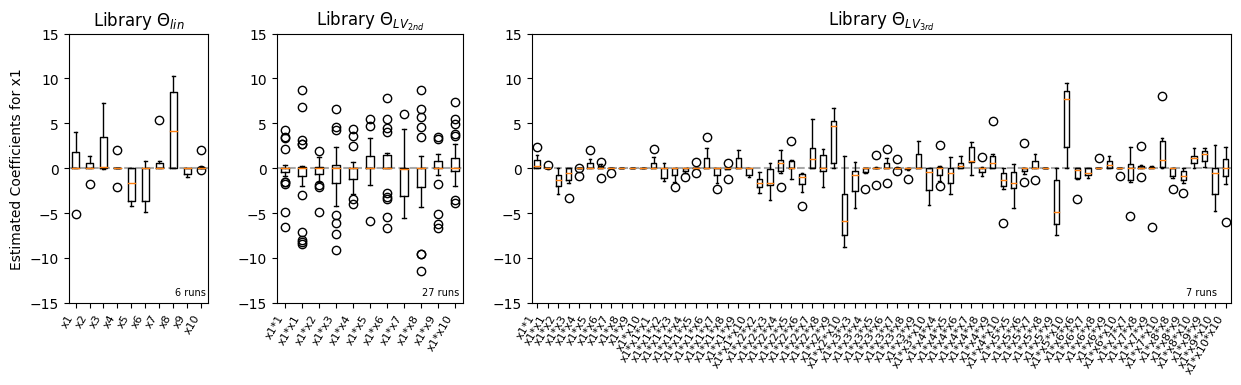

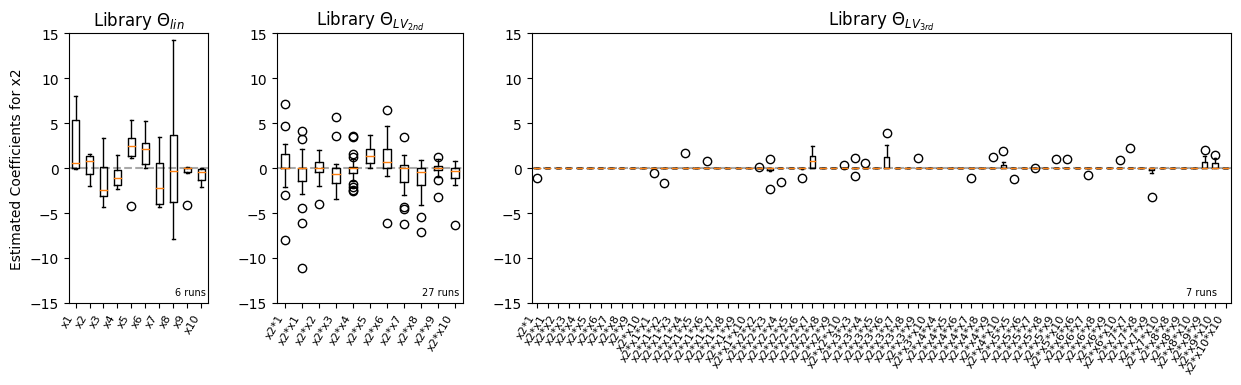

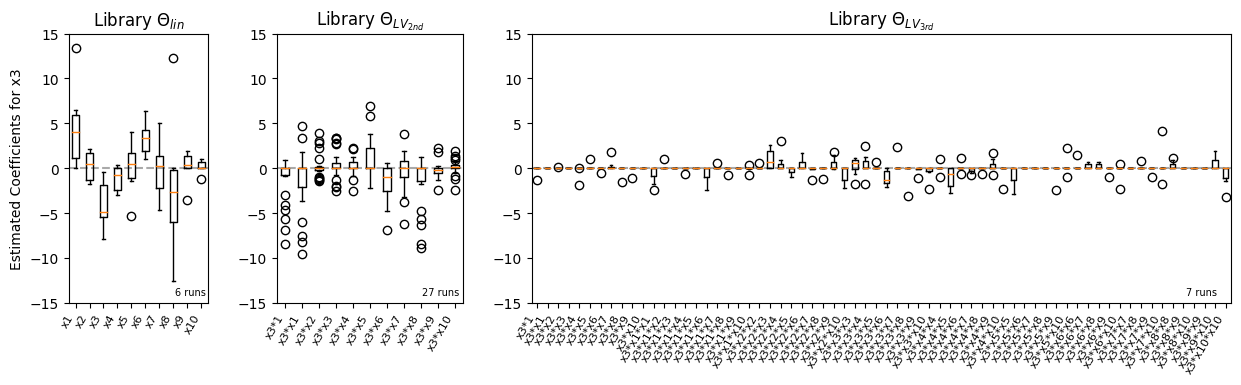

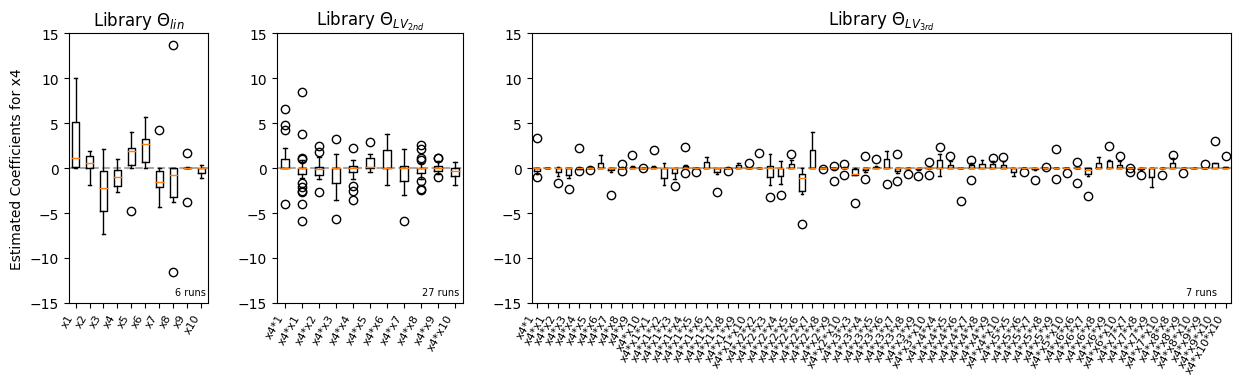

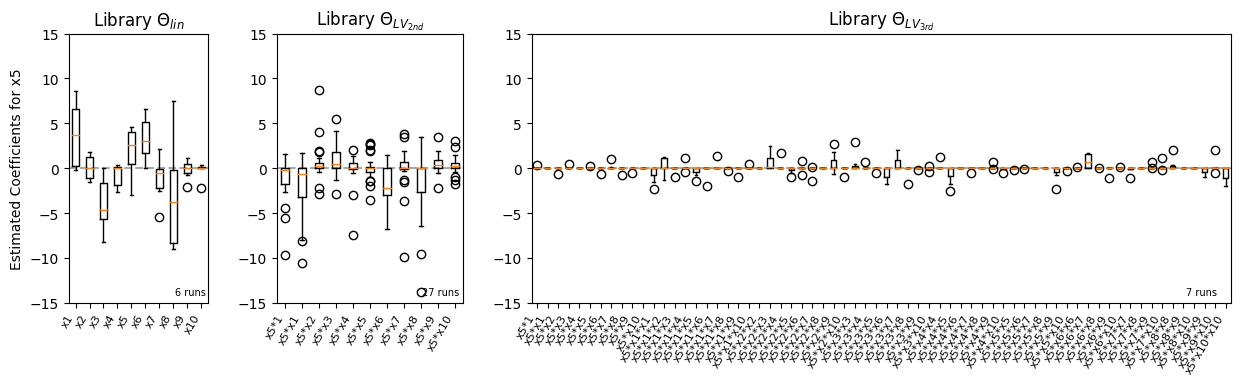

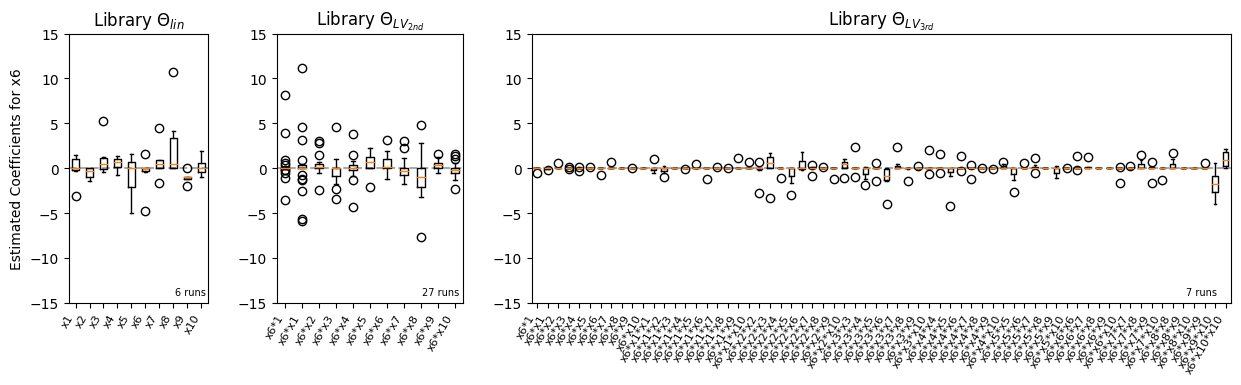

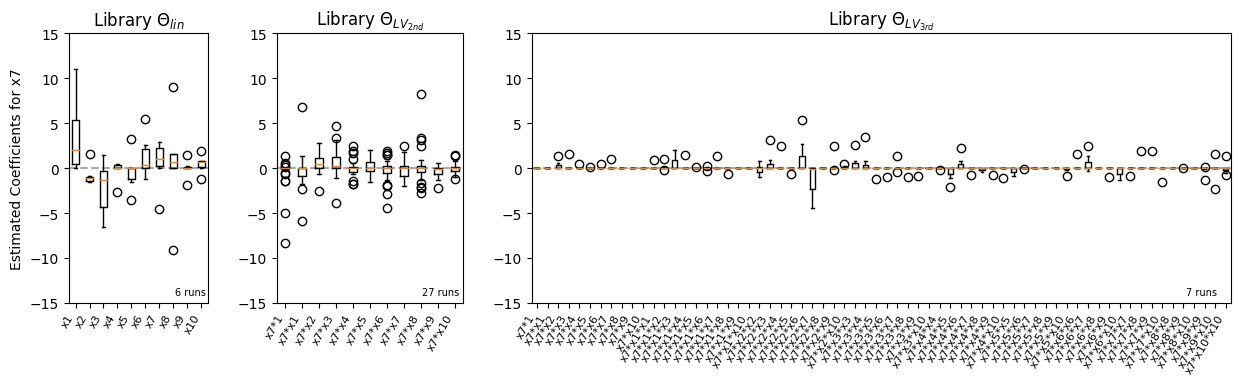

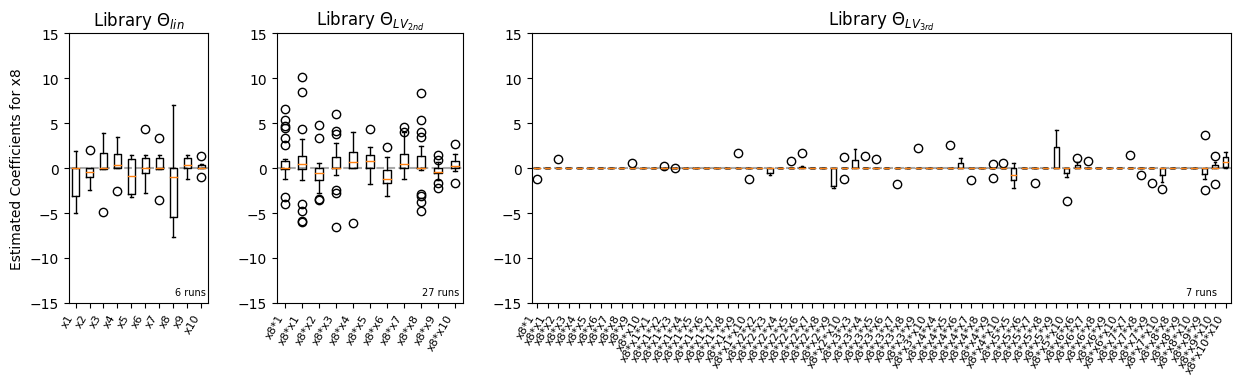

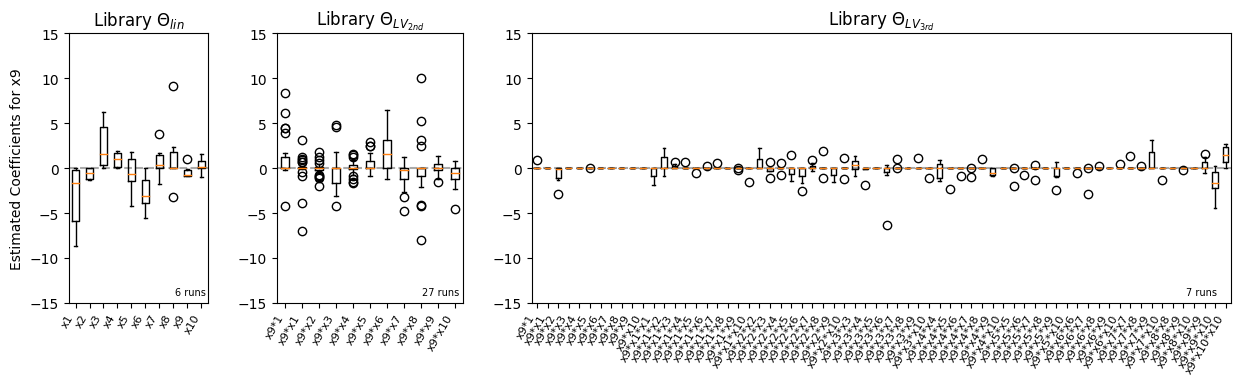

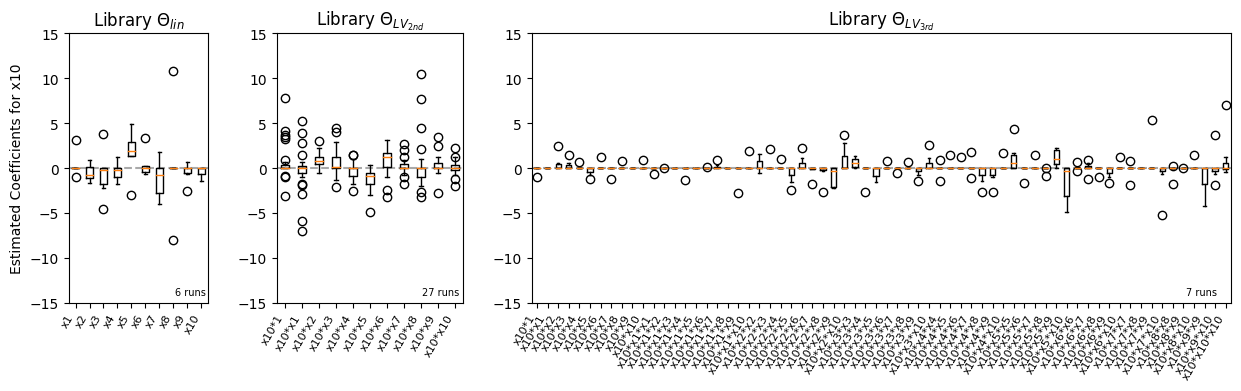

In [8]:
# variable_to_plot = "x2"
for variable_to_plot in taxa_names:

    # Adjusting the figure layout
    width_ratios = [3, 4, 15]
    fig = plt.figure(figsize=(15, 3.5))
    gs = gridspec.GridSpec(1, len(libraries), width_ratios=width_ratios, wspace=0.2)
    axs = [plt.subplot(gs[i]) for i in range(len(libraries))]

    for i, lib in enumerate(libraries):
        result = generate_boxplots(lib, variable_to_plot)
        if result:
            coeffs, library_values, n_runs = result
            create_boxplot(axs[i], coeffs, library_values, "", y_limits=[-15, 15])
            axs[i].text(0.98, 0.02, f'{n_runs} runs', ha='right', va='bottom', fontsize=7, transform=axs[i].transAxes)

    # set column titles
    axs[0].set_title(r'Library $\Theta_{lin}$', fontsize=12)
    axs[1].set_title(r'Library $\Theta_{LV_{2nd}}$', fontsize=12)
    axs[2].set_title(r'Library $\Theta_{LV_{3rd}}$', fontsize=12)
    axs[0].set_ylabel(f"Estimated Coefficients for {variable_to_plot}", fontsize=10)

    plt.tight_layout()

    # save plot
    plt.savefig(f'{plot_dir}/DeepMoD_female_coeff_{variable_to_plot}_boxplots_three_libraries.pdf', 
                bbox_inches='tight', dpi = 300)

### all variables in one plot

C:\Users\Maria\AppData\Local\Temp\ipykernel_6548\1824208255.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1)


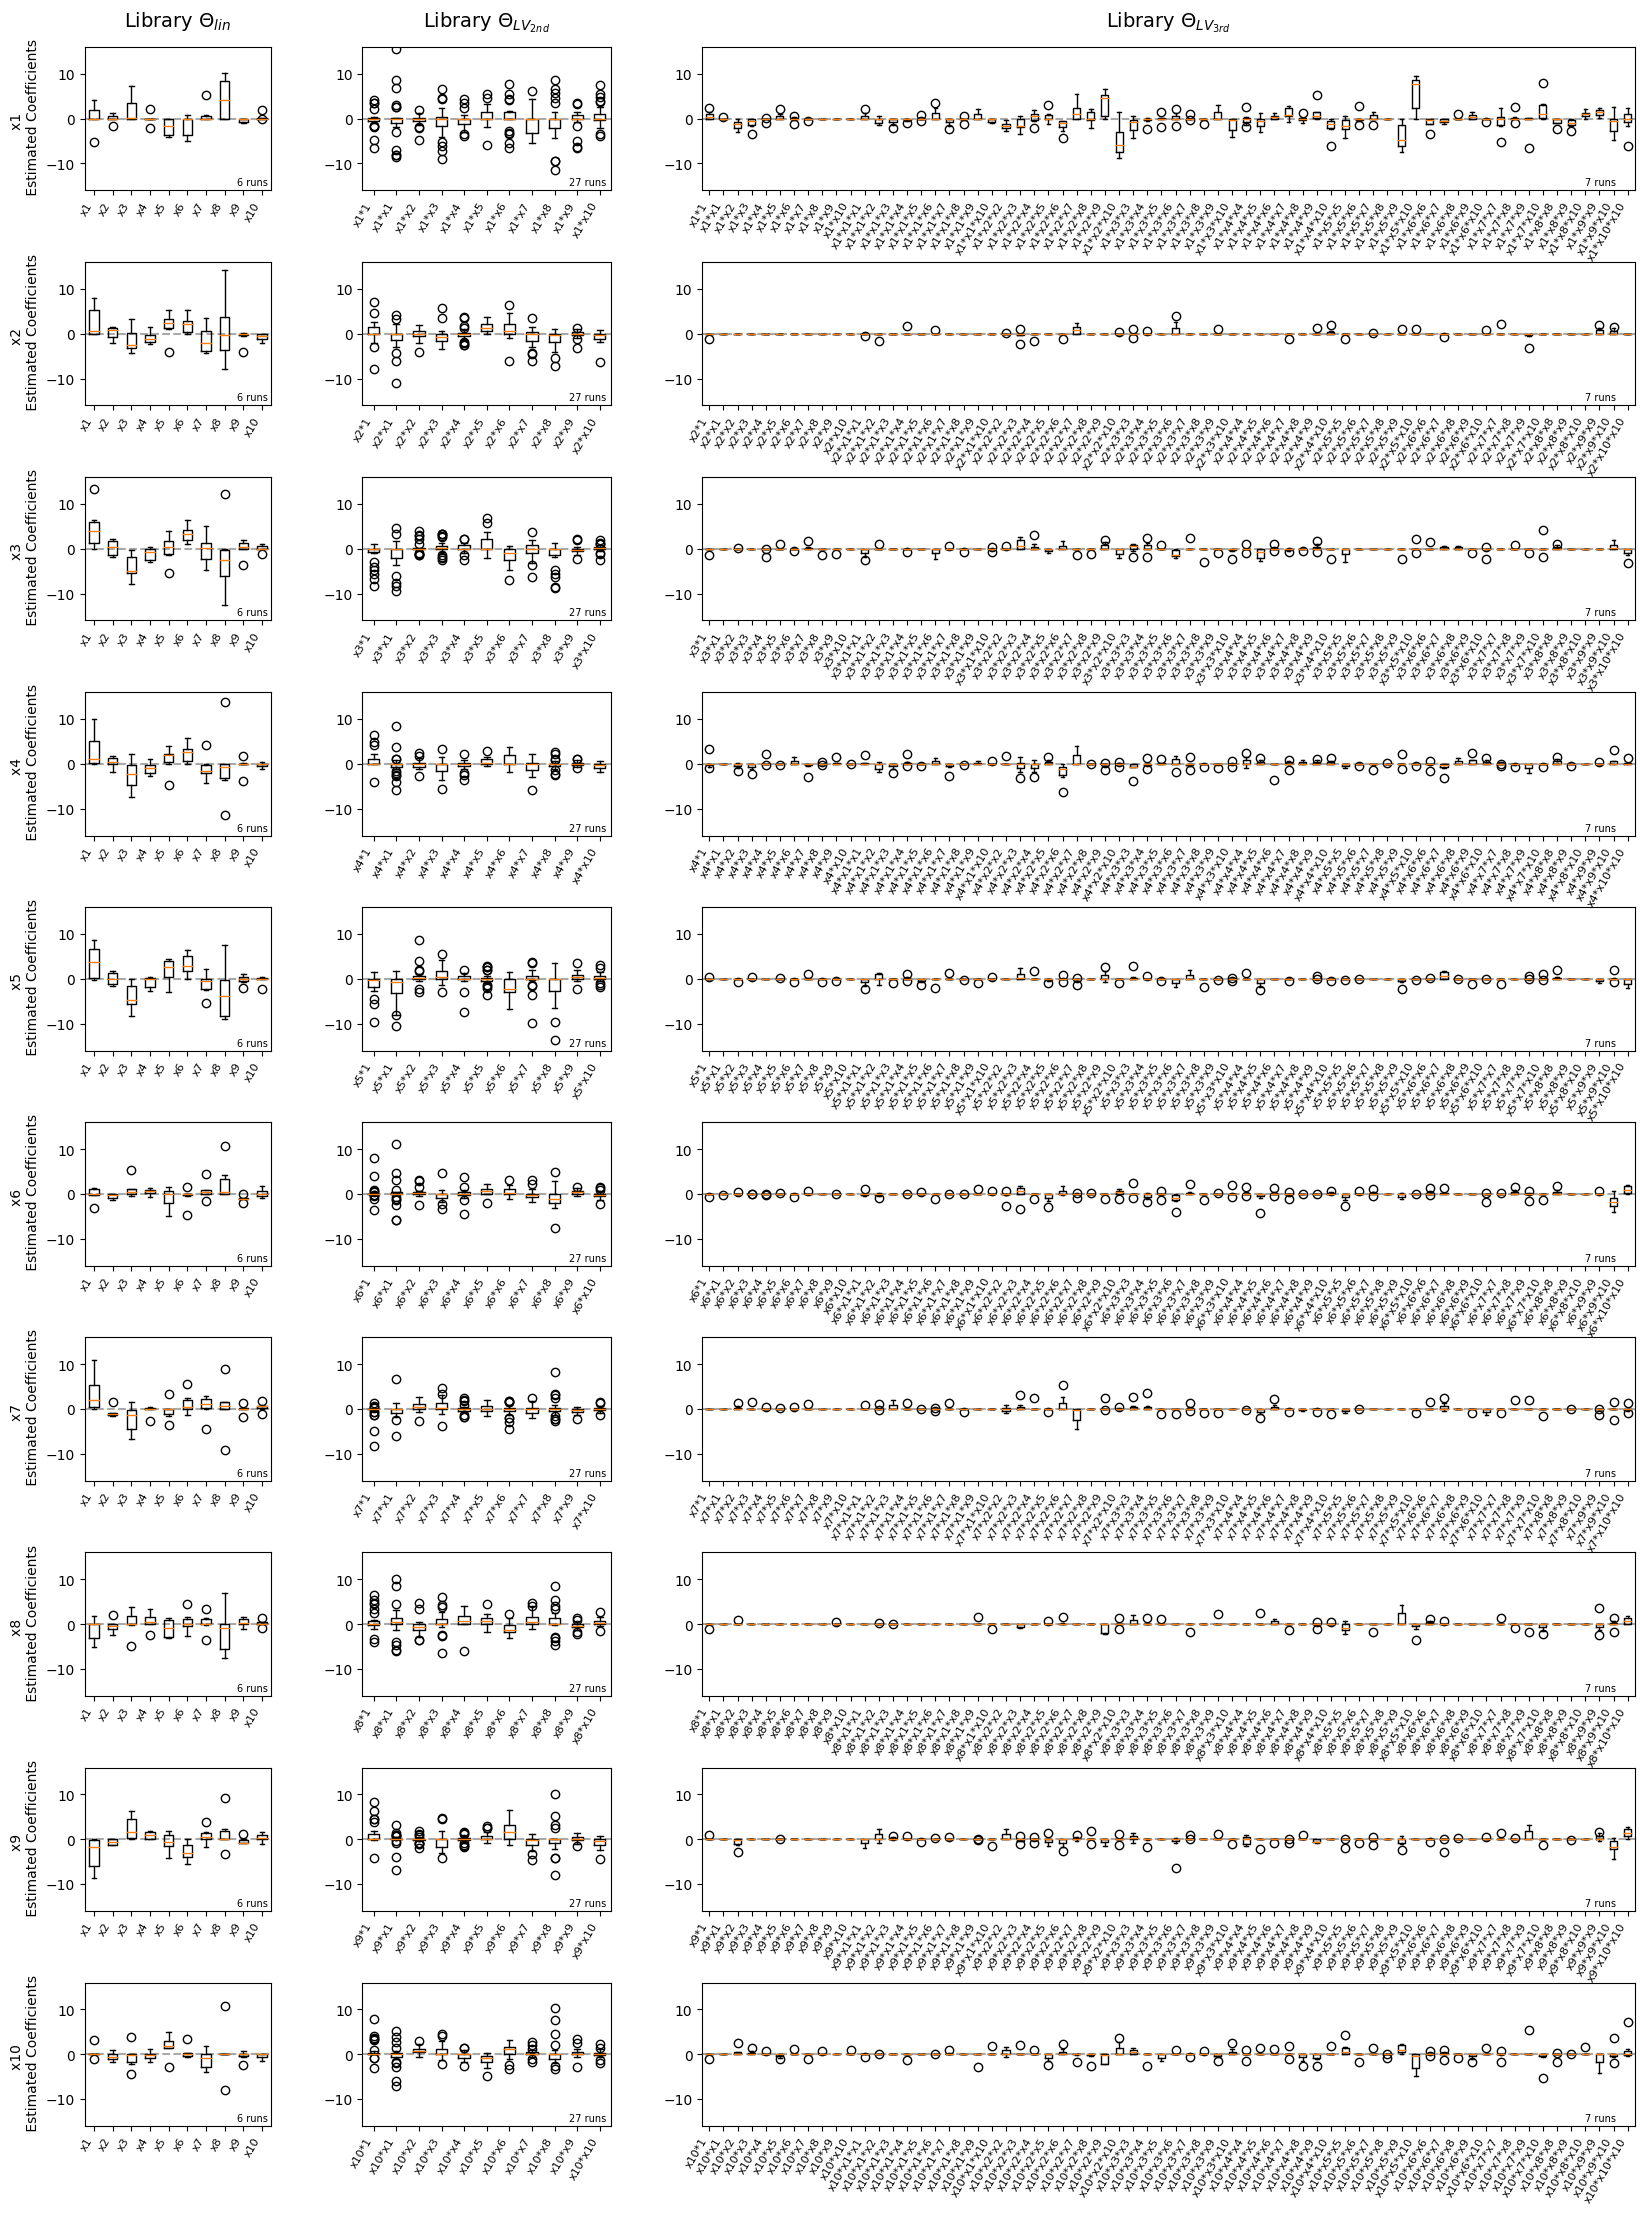

In [9]:
width_ratios = [3, 4, 15]
fig = plt.figure(figsize=(20, 27))
gs = gridspec.GridSpec(n_taxa, len(libraries), width_ratios=width_ratios, wspace=0.2, hspace=0.5)
axs = np.array([[plt.subplot(gs[i, j]) for j in range(len(libraries))] for i in range(n_taxa)])

for i, variable_to_plot in enumerate(taxa_names):
    for j, lib in enumerate(libraries):
        result = generate_boxplots(lib, variable_to_plot)
        if result:
            coeffs, library_values, n_runs = result
            create_boxplot(axs[i, j], coeffs, library_values, "", y_limits=[-16, 16]) # 
            axs[i, j].text(0.98, 0.02, f'{n_runs} runs', ha='right', va='bottom', fontsize=7, transform=axs[i, j].transAxes)
        if j == 0:
            axs[i, j].set_ylabel(f"{variable_to_plot} \n Estimated Coefficients", fontsize=10)
        if i == 0:
            axs[i, j].set_title(['Library $\Theta_{lin}$', 'Library $\Theta_{LV_{2nd}}$', 'Library $\Theta_{LV_{3rd}}$'][j], fontsize=14, pad = 15)

plt.tight_layout(pad=1)
plt.savefig(f'{plot_dir}/DeepMoD_female_coeff_boxplots_three_libraries.pdf',
            bbox_inches='tight', dpi = 300)

## Plot fits DeepMoD HumanTS female, number of hidden layers 1-9

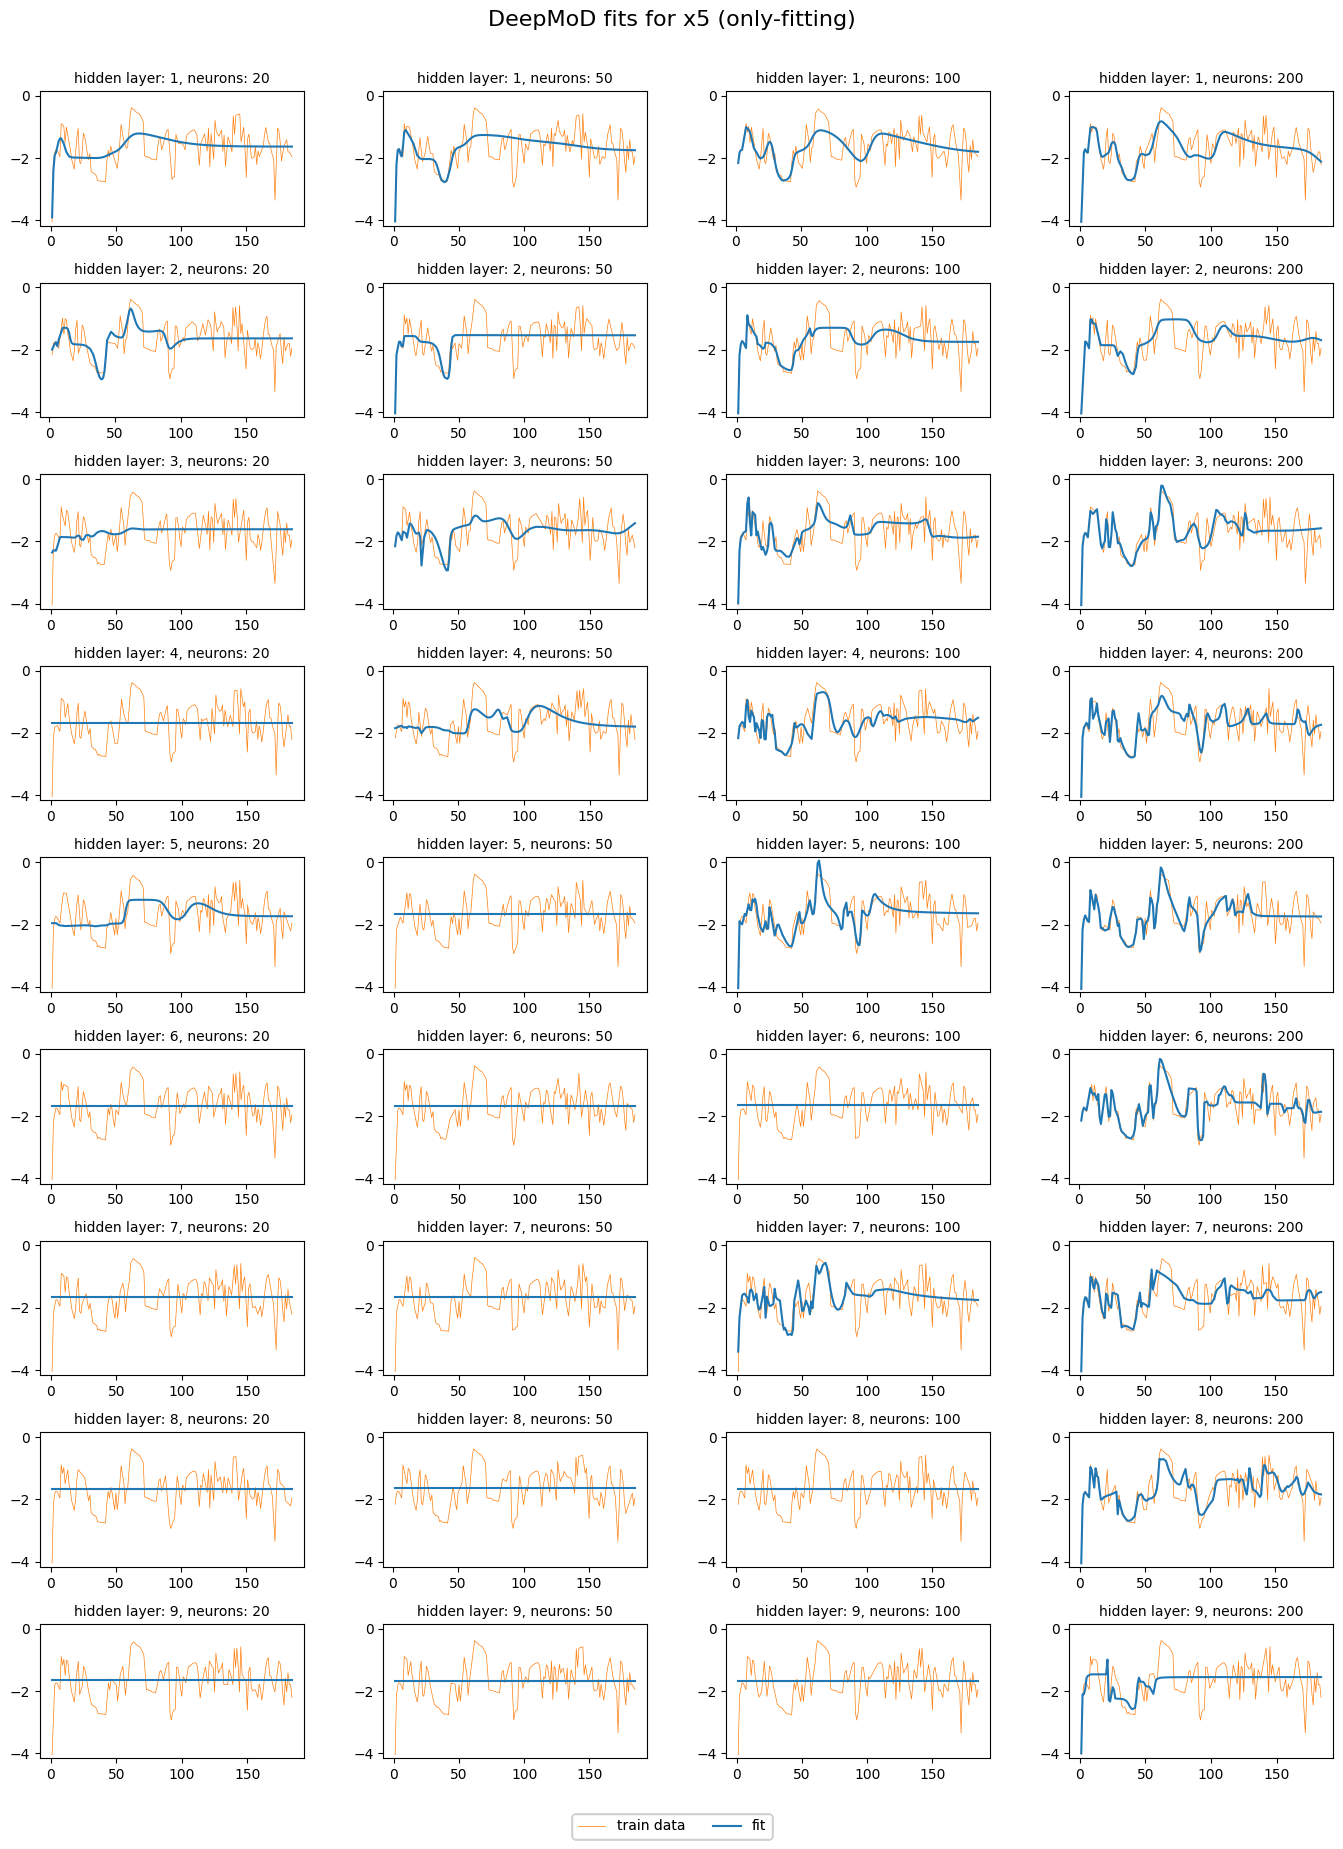

In [10]:
out_dir = output_dir_deepmod + "humanTS_Genus10/ALR_female/only-fitting/"

# for taxon in np.arange(1, n_taxa + 1):
taxon = 5

if(n_runs > 0):
    # n_runs = len(os.listdir(out_dir))
    # set plot dimensions
    n_col = 4
    n_row = 9

    # make plot
    fig, axs = plt.subplots(n_row, n_col)
    fig.set_figwidth(3.5*n_col)
    fig.set_figheight(2*n_row)
    fig.suptitle(f"DeepMoD fits for x{taxon} (only-fitting)",
                size=16, y=1.0)
    fig.tight_layout(pad=2.0)  
    
    overall_min = 0
    overall_max = 0

    y = 0

    for hl_number in range(1,10):
        for hl_size in [20, 50, 100, 200]:
            runs = [s for s in os.listdir(out_dir) if "test_run01" in s and 
                    "." not in s and f'_{hl_number}_{hl_size}_' in s]
            run = runs[0]
            plot_path_tmp = f"{out_dir}{run}/Data/"
            if os.path.exists(f"{plot_path_tmp}/prediction_x{taxon}.csv"):
                # read data files
                df_pred = pd.read_csv(f"{plot_path_tmp}prediction_x{taxon}.csv", header=[0])
                df_data_train = pd.read_csv(f"{plot_path_tmp}data_train_x{taxon}.csv", header=[0])
                # convert files to numpy array
                data_train = np.array(df_data_train)
                pred = np.array(df_pred)
                # make plot
                axs[int(y/n_col), (y % n_col)].plot(data_train[:,1], data_train[:,0], label = "train data",  linewidth=0.5, color = colors[1])
                axs[int(y/n_col), (y % n_col)].plot(pred[:,1], pred[:,0], label = "fit")
                axs[int(y/n_col), (y % n_col)].set_title(f"hidden layer: {hl_number}, neurons: {hl_size}", size = 10)

                y += 1

                # get smallest and largest value to scale the y axis
                current_min = min(data_train[:,0].min(), pred[:,0].min())
                current_max = max(data_train[:,0].max(), pred[:,0].max())
                overall_max = max(overall_max, current_max)
                overall_min = min(overall_min, current_min)
        
        plt.setp(axs, ylim=(overall_min - 0.1, overall_max + 0.1))

        # add overall legend below the plots
        handles, labels = [], []
        for ax in axs.ravel():
            for h, l in zip(*ax.get_legend_handles_labels()):
                if l not in labels:
                    handles.append(h)
                    labels.append(l)
        fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.02), ncol = 2, fontsize = 10)

        # save plots in one file
        plt.savefig(f'{plot_dir}/DeepMoD_fits_female_only-fitting_x{taxon}_hl_1-9.pdf',
                    bbox_inches='tight', dpi = 300)

## Plot fits DeepMoD vs. NODEBNGM example runs for x10

### DeepMoD

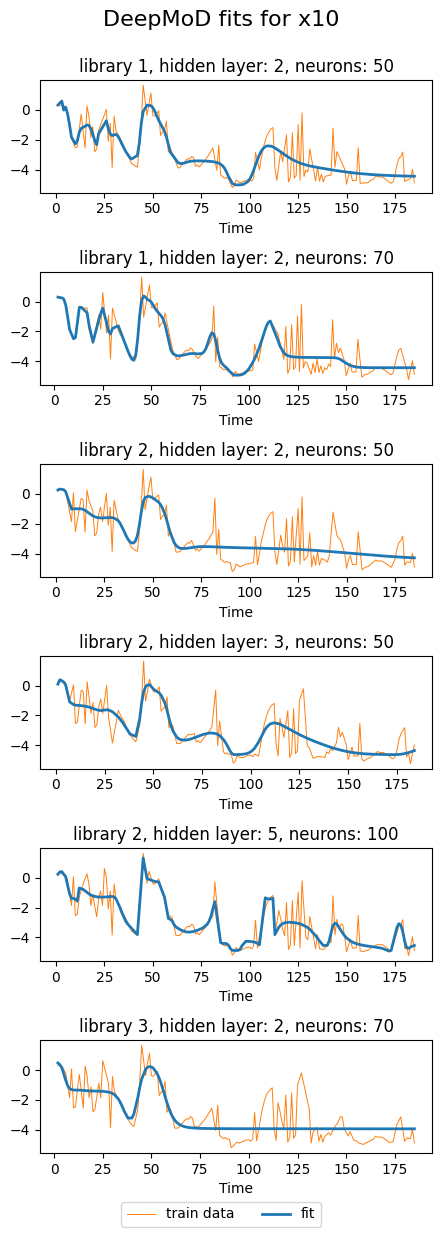

In [11]:
out_dir = output_dir_deepmod + "humanTS_Genus10/ALR_female/fits_to_compare/"

# for taxon in np.arange(1, n_taxa + 1):
taxon = 10
runs = []
for file in [s for s in os.listdir(out_dir) if "." not in s]:
    m = re.search('run(.+?)_', file)
    if m:
        runs.append(file)
# specify dimensions of the plot
n_runs = len(runs)

if(n_runs > 0):
    # set plot dimensions
    n_col = 1
    n_row = n_runs

    # make plot
    fig, axs = plt.subplots(n_row, n_col)
    fig.set_figwidth(4.5*n_col)
    fig.set_figheight(2*n_row)
    fig.suptitle(f"DeepMoD fits for x{taxon}",
                size=16, y=1.0)

    for idx, run in enumerate(runs):
        plot_path_tmp = f"{out_dir}{run}/Data/"
        if os.path.exists(f"{plot_path_tmp}/prediction_x{taxon}.csv"):
            # read data files
            df_pred = pd.read_csv(f"{plot_path_tmp}prediction_x{taxon}.csv", header=[0])
            df_data_train = pd.read_csv(f"{plot_path_tmp}data_train_x{taxon}.csv", header=[0])
            # convert files to numpy array
            data_train = np.array(df_data_train)
            pred = np.array(df_pred)
            # make plot
            axs[idx].plot(data_train[:,1], data_train[:,0], label = "train data", linewidth=0.7, color = colors[1])
            axs[idx].plot(pred[:,1], pred[:,0], label = "fit", linewidth=2)
            axs[idx].set_xlabel("Time")
            hl = re.search(r"_(\d{1,2})_(\d{2,3})", run)
            run_nr = re.search(r"run(\d{1,2})", run)
            lib = re.search(r"_int(\d{1})", run)
            axs[idx].set_title(f'library {lib.group(1)}, hidden layer: {hl.group(1)}, neurons: {hl.group(2)}', size = 12)

    # add overall legend below the plots
    handles, labels = [], []
    for ax in axs.ravel():
        for h, l in zip(*ax.get_legend_handles_labels()):
            if l not in labels:
                handles.append(h)
                labels.append(l)
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.02), ncol = 2)

    fig.tight_layout(pad=1.0)

    # save plots in one file
    plt.savefig(f'{plot_dir}/DeepMoD_female_ALR_prediction_fits_x{taxon}_runs_to_compare.pdf',
                bbox_inches='tight', dpi = 300)

### NODEBNGM

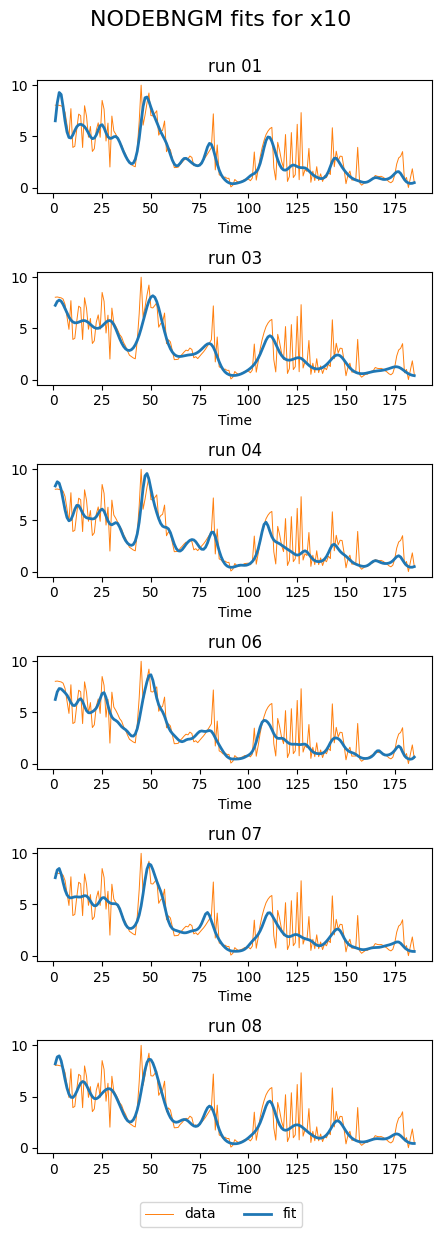

In [12]:
dataset = "female_ALR"
out_dir = output_dir_node + "out_" + dataset + "/"

# for taxon in np.arange(n_taxa):
taxon = 9
# get list of available runs for the given dataset
runs = []
for file in [s for s in os.listdir(out_dir) if "." not in s]:
    m = re.search(r"run(\d{2})", file)
    if m:
        runs.append(file)
runs = [runs[i] for i in [1,3,4,6,7,8]]

# specify dimensions of the plot
n_runs = len(runs)

# check if runs for these specifications are available
if n_runs > 0:
    # set plot dimensions
    n_col = 1
    n_row = n_runs

    # make plot
    fig, axs = plt.subplots(n_row, n_col)
    fig.set_figwidth(4.5*n_col)
    fig.set_figheight(2*n_row)
    fig.suptitle(f"NODEBNGM fits for x{taxon+1}",
                size=16, y=1.0)

    for idx, run in enumerate(runs):
        out_run = f"{out_dir}{run}"
        if os.path.exists(f"{out_run}/Yhat.csv"):
            # read data files
            df_pred = pd.read_csv(f"{out_run}/Yhat.csv", header=[0])
            df_data_obs = pd.read_csv(f"{out_run}/TS_{dataset}.csv", header=[0])

            # convert files to numpy array
            data_obs = np.array(df_data_obs)
            pred = np.array(df_pred)

            # make plot
            axs[idx].plot(data_obs[:,0], data_obs[:,taxon+1], label = "data",  linewidth=0.7, color = colors[1])
            axs[idx].plot(data_obs[:,0], pred[:,taxon], label = "fit", linewidth=2)
            axs[idx].set_xlabel("Time")
            run_nr = re.search(r"run(\d{1,2})", run)
            axs[idx].set_title(f'run {run_nr.group(1)}', size = 12)

    # add overall legend below the plots
    handles, labels = [], []
    for ax in axs.ravel():
        for h, l in zip(*ax.get_legend_handles_labels()):
            if l not in labels:
                handles.append(h)
                labels.append(l)
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.02), ncol = 2)

    fig.tight_layout(pad=1.0)
            
    # save plots in one file
    plt.savefig(f'{plot_dir}/NODEBNGM_{dataset}_prediction_fits_x{taxon+1}_runs1-8.pdf',
                bbox_inches='tight', dpi = 300)

## Boxplots DeepMoD humanTS female effects, weights, weighted effects

In [13]:
# Function to create a boxplot for a given axis
def create_boxplot(ax, data, title = None, x_labels=None, ylim = None, set_x_labels=True):
    boxplot = ax.boxplot(data)
    if title is not None:
        ax.set_title(title, fontsize = 14, pad = 14)
    if x_labels is None:
        x_labels = [f'x{i}' for i in range(1, len(data)+1)]
    if set_x_labels:
        ax.set_xticklabels(x_labels, rotation=60, ha="right")
    else:
        ax.set_xticklabels("")
    ax.axhline(y=0, color='#A9A9A9', linestyle='--', zorder=-3) # add horizontal line in 0
    if ylim is not None:
        ax.set_ylim(ylim)

def generate_boxplot_data(folder, Mat, libraries):
    runs = []
    for lib in libraries:
        runs_tmp = [
            f'{lib}/{s}' for s in os.listdir(f'{folder}{lib}/')
            if os.path.isdir(os.path.join(f'{folder}{lib}/', s)) and
            "." not in s and
            os.path.isfile(os.path.join(f'{folder}{lib}/', s, f"Data/{Mat}.csv"))
        ]
        runs.extend(runs_tmp)

    if not runs:
        print(f"No runs found in {folder}.")
        return None
    
    list_coeffs_all = [pd.read_csv(f"{folder}/{run}/Data/{Mat}.csv", header=[0]).to_numpy() for run in runs]
    names = pd.read_csv(f"{folder}/{runs[0]}/Data/{Mat}.csv", header=[0]).columns

    coeffs = [[[] for _ in range(list_coeffs_all[0].shape[0])] for _ in range(list_coeffs_all[0].shape[1])]  # n_taxa empty lists of n_effects (= n_taxa) empyt lists

    for arr in list_coeffs_all:
        for taxon in range(arr.shape[1]):
            for effect in range(arr.shape[0]):
                coeffs[taxon][effect].append(arr[taxon, effect])

    n_runs = len(runs)

    return coeffs, names, n_runs

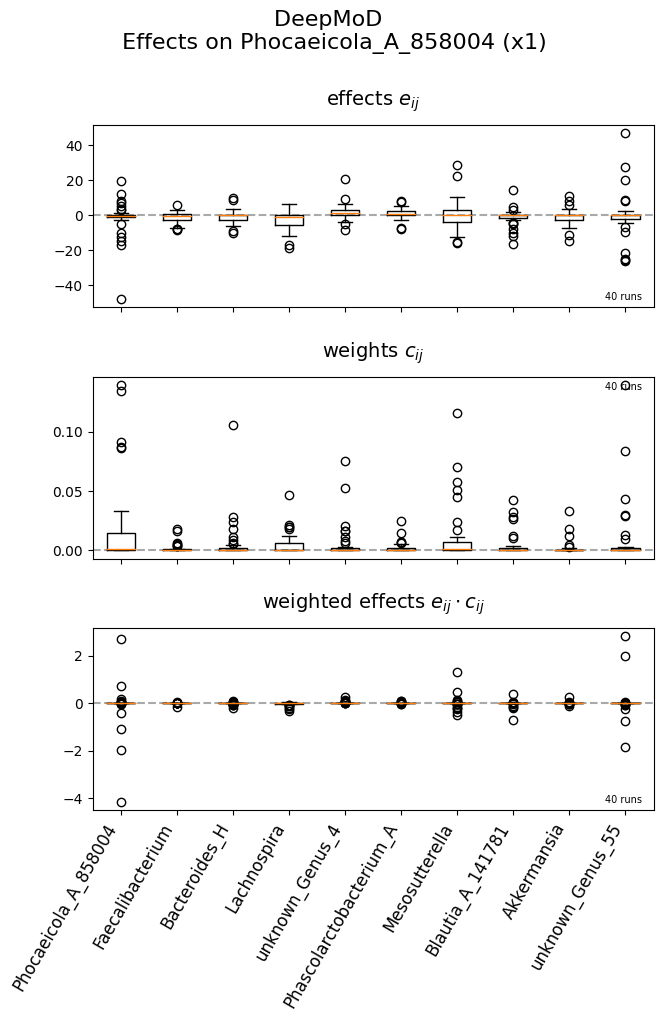

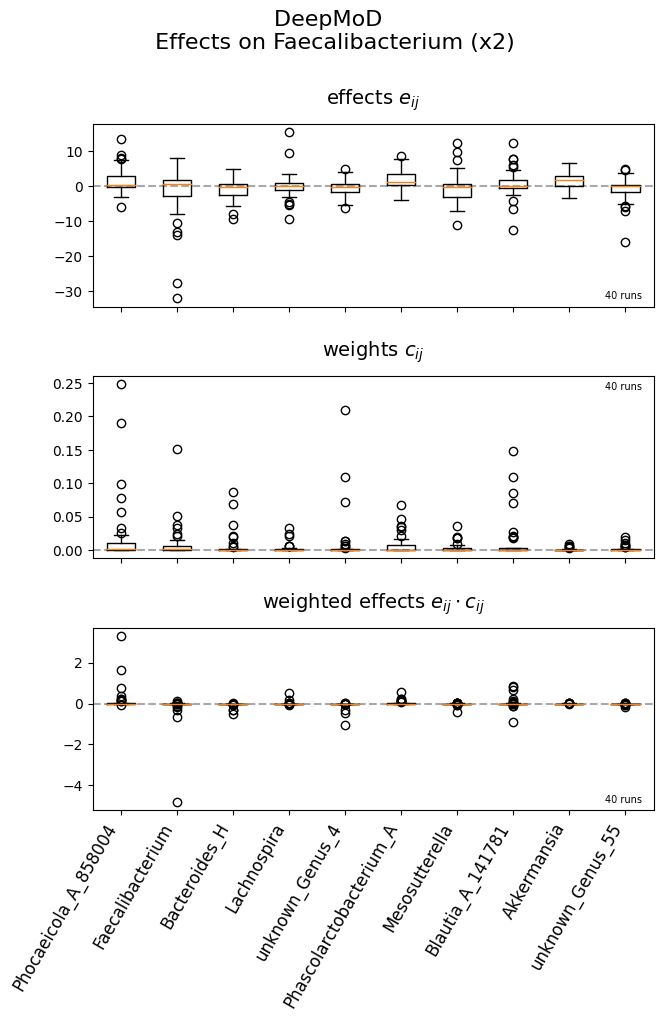

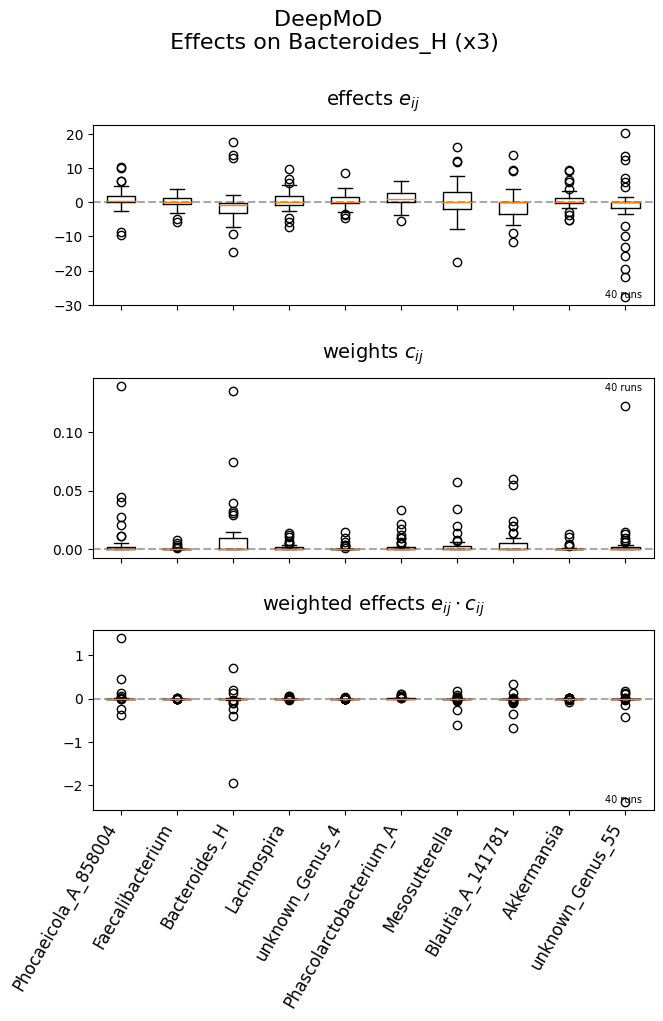

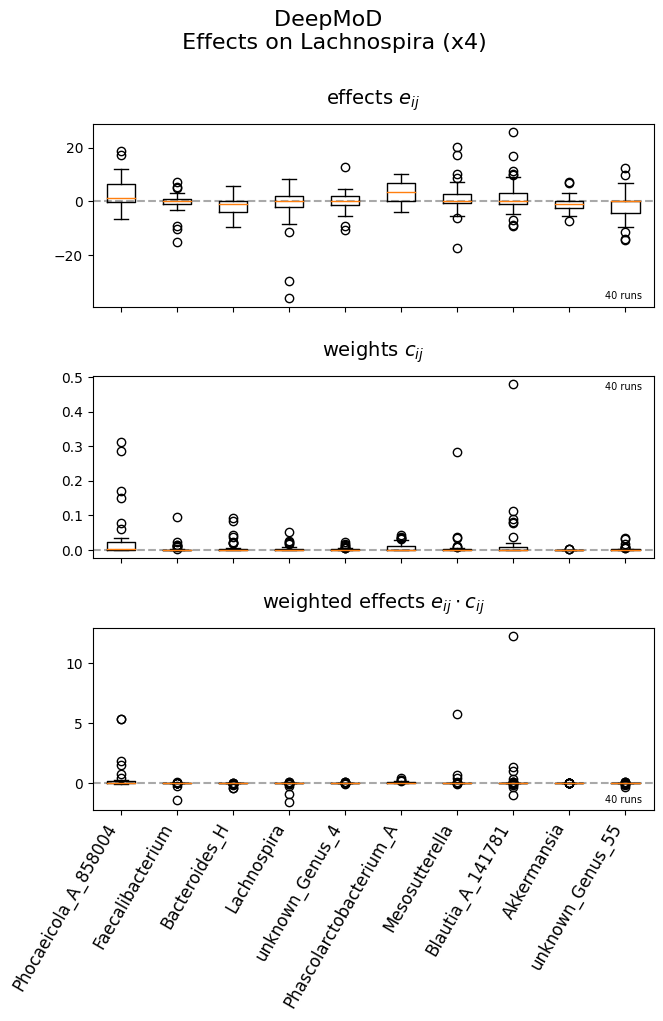

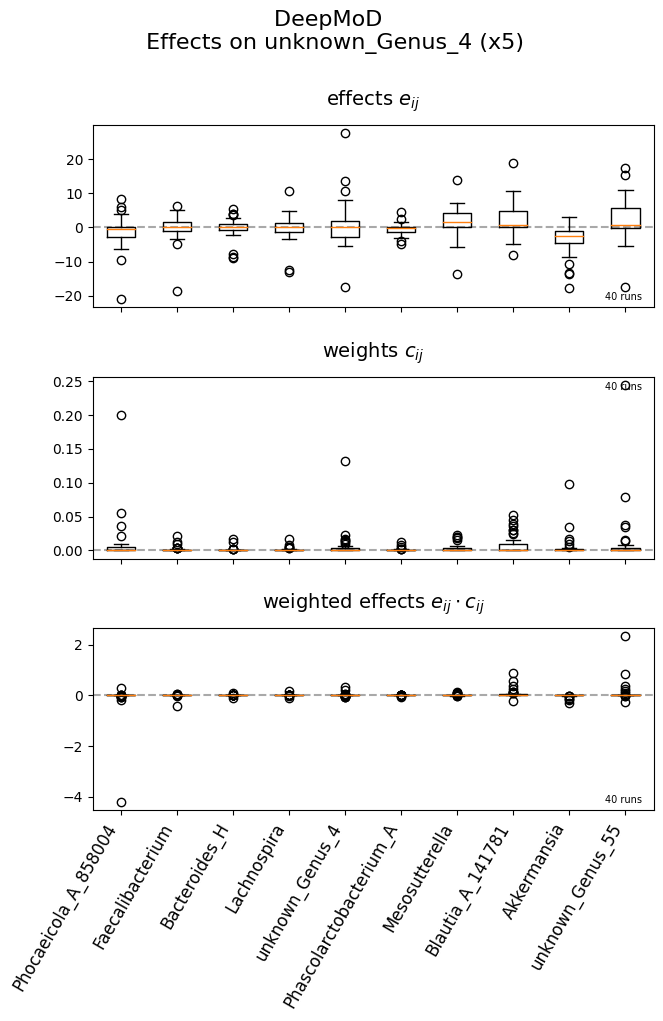

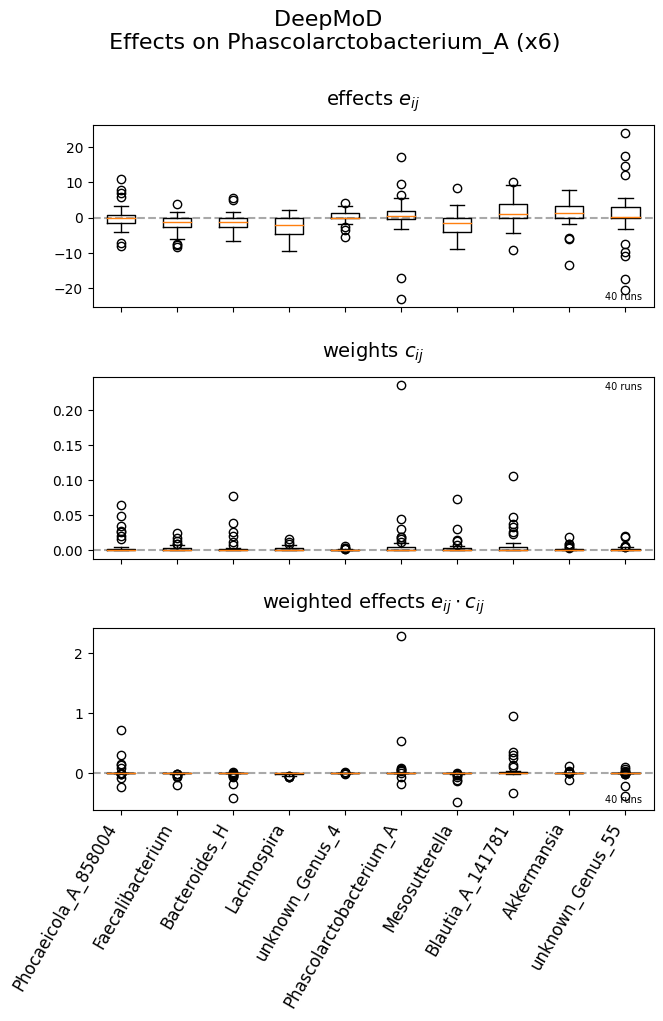

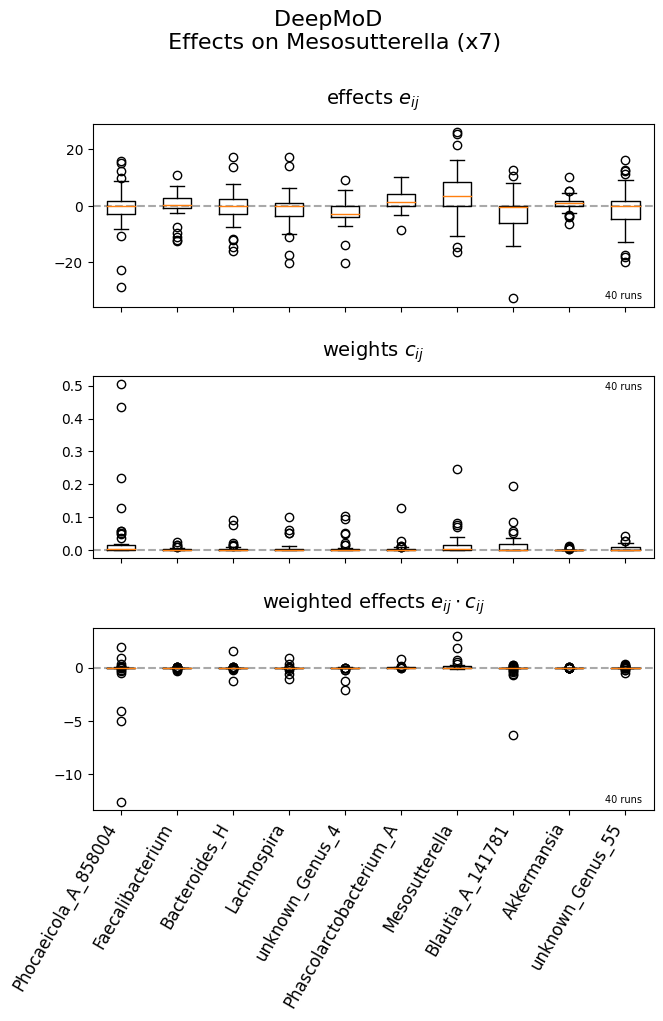

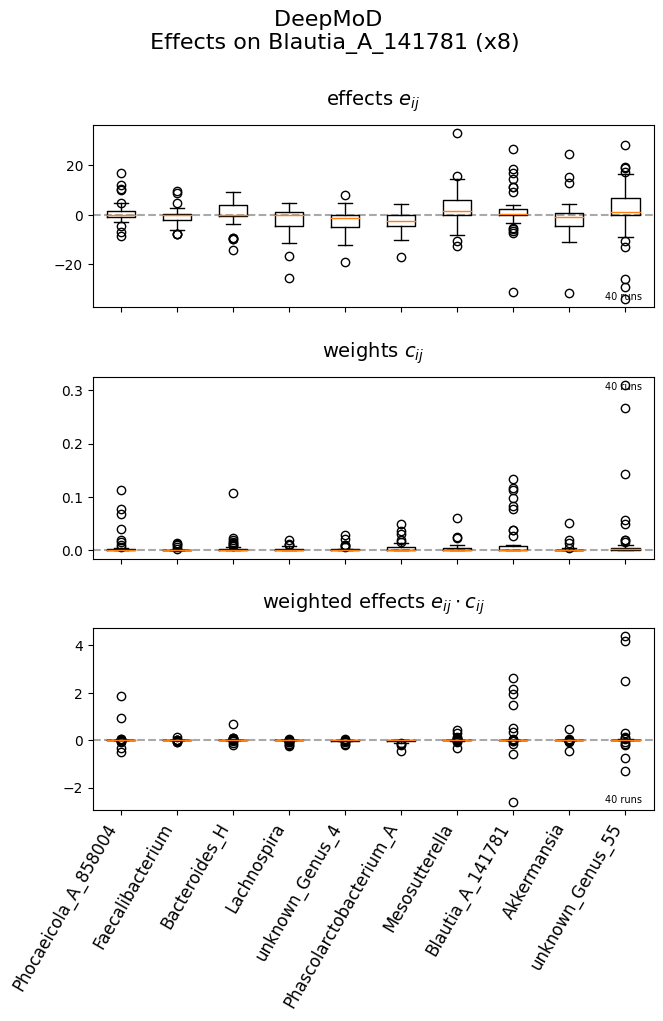

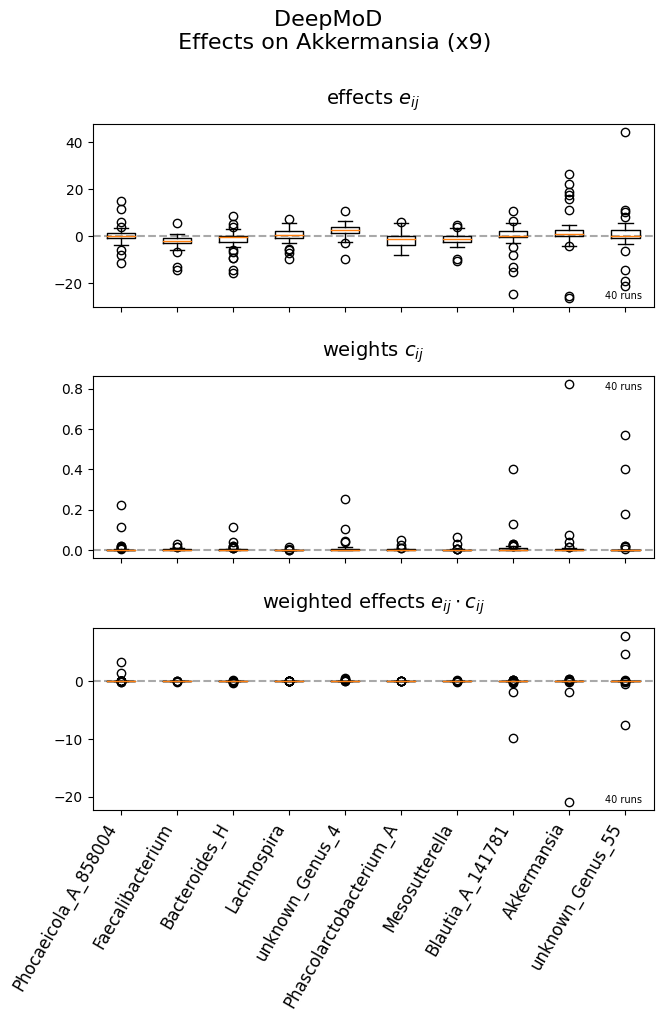

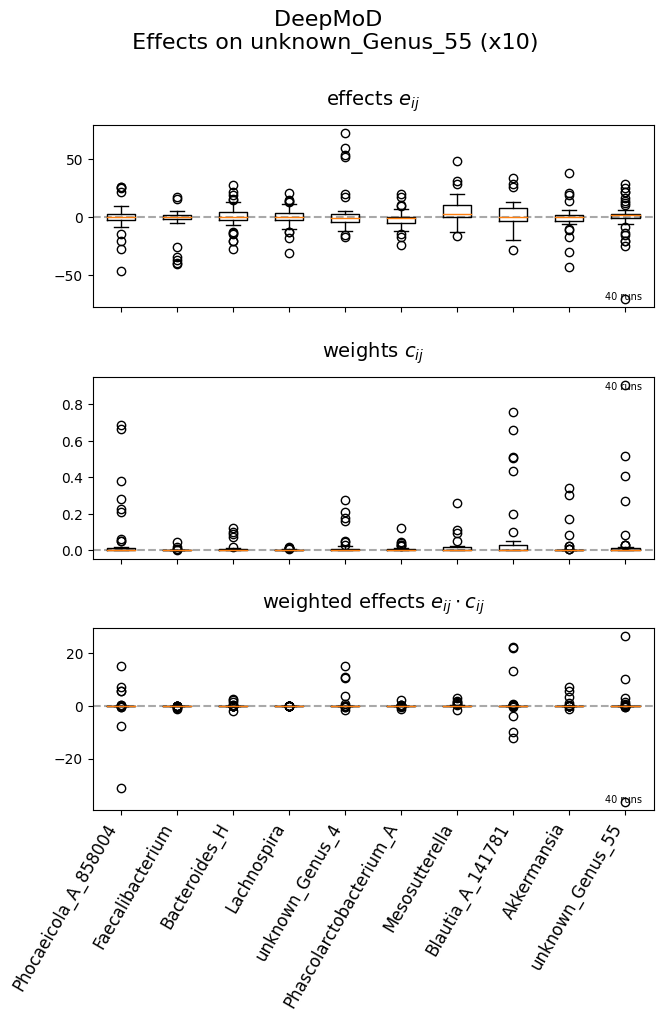

In [14]:
out_dir = output_dir_deepmod + "humanTS_Genus10/ALR_female/"
Mats = ["effectsMat", "weightsMat", "weighted_effectsMat"]

for taxon in np.arange(n_taxa):

    n_col = 1
    n_row = len(Mats)
    fig, axs = plt.subplots(nrows=n_row, ncols=n_col, figsize=(7*n_col, 3.5* n_row))
                
    for libraries in [["int1", "int2", "int3"]]: # , ["int1"], ["int2"], ["int3"]

        # iterate over matrices
        for i, ax in enumerate(axs.flat, start=0):
            Mat = Mats[i]
            result = generate_boxplot_data(out_dir, Mats[i], libraries)
            if result:
                coeffs, names, n = result
            
                create_boxplot(ax, coeffs[taxon], x_labels=names, set_x_labels=False) # , ylim=[-10,10]

        ax.set_xticklabels(names, rotation=60, ha="right", fontsize=12)

        # add text in right (bottom or top) corner with number of runs
        axs[0].text(0.98, 0.03, f'{n} runs', ha='right', va='bottom', fontsize=7, transform=axs[0].transAxes)
        axs[1].text(0.98, 0.97, f'{n} runs', ha='right', va='top', fontsize=7, transform=axs[1].transAxes)
        axs[2].text(0.98, 0.03, f'{n} runs', ha='right', va='bottom', fontsize=7, transform=axs[2].transAxes)
        
        # set titles
        fig.suptitle(f"DeepMoD \n Effects on {names[taxon]} (x{taxon+1})", size = 16)
        axs[0].set_title(r'effects $e_{ij}$', fontsize = 14, pad = 14)
        axs[1].set_title(r'weights $c_{ij}$', fontsize = 14, pad = 14)
        axs[2].set_title(r'weighted effects $e_{ij} \cdot c_{ij}$', fontsize = 14, pad = 14)

        plt.tight_layout(pad = 2)

        # save plot
        plt.savefig(f"{out_dir}/boxplot_DeepMoD_allMats_allLibs_x{taxon+1}.pdf",
                    bbox_inches='tight', dpi = 300)

## Boxplots NODEBNGM humanTS effects, weights, weighted effects

In [15]:
out_dir = output_dir_node + "out_female_ALR/" # + "_same_basis/"

# Function to create a boxplot for a given axis
def create_boxplot(ax, data, title = None, x_labels=None, ylim = None, set_x_labels=True):
    boxplot = ax.boxplot(data)
    if title is not None:
        ax.set_title(title, fontsize = 14, pad = 14)
    if x_labels is None:
        x_labels = [f'x{i}' for i in range(1, len(data)+1)]
    if set_x_labels:
        ax.set_xticklabels(x_labels, rotation=60, ha="right")
    else:
        ax.set_xticklabels("")
    ax.axhline(y=0, color='#A9A9A9', linestyle='--', zorder=-3) # add horizontal line in 0
    if ylim is not None:
        ax.set_ylim(ylim)

def generate_boxplot_data(folder, Mat):
    runs = [
        s for s in os.listdir(folder)
        if os.path.isdir(os.path.join(folder, s)) and
           "." not in s and
           os.path.isfile(os.path.join(folder, s, f"{Mat}.csv"))
    ]

    if not runs:
        print(f"No runs found in {folder}.")
        return None
    
    list_coeffs_all = [pd.read_csv(f"{folder}/{run}/{Mat}.csv", header=[0]).to_numpy() for run in runs]
    names = pd.read_csv(f"{folder}/{runs[0]}/{Mat}.csv", header=[0]).columns

    coeffs = [[[] for _ in range(list_coeffs_all[0].shape[0])] for _ in range(list_coeffs_all[0].shape[1])]  # n_taxa empty lists of n_effects (= n_taxa) empyt lists

    for arr in list_coeffs_all:
        for taxon in range(arr.shape[1]):
            for effect in range(arr.shape[0]):
                coeffs[taxon][effect].append(arr[taxon, effect])

    n_runs = len(runs)

    return coeffs, names, n_runs

### all variables and one matrix in one plot

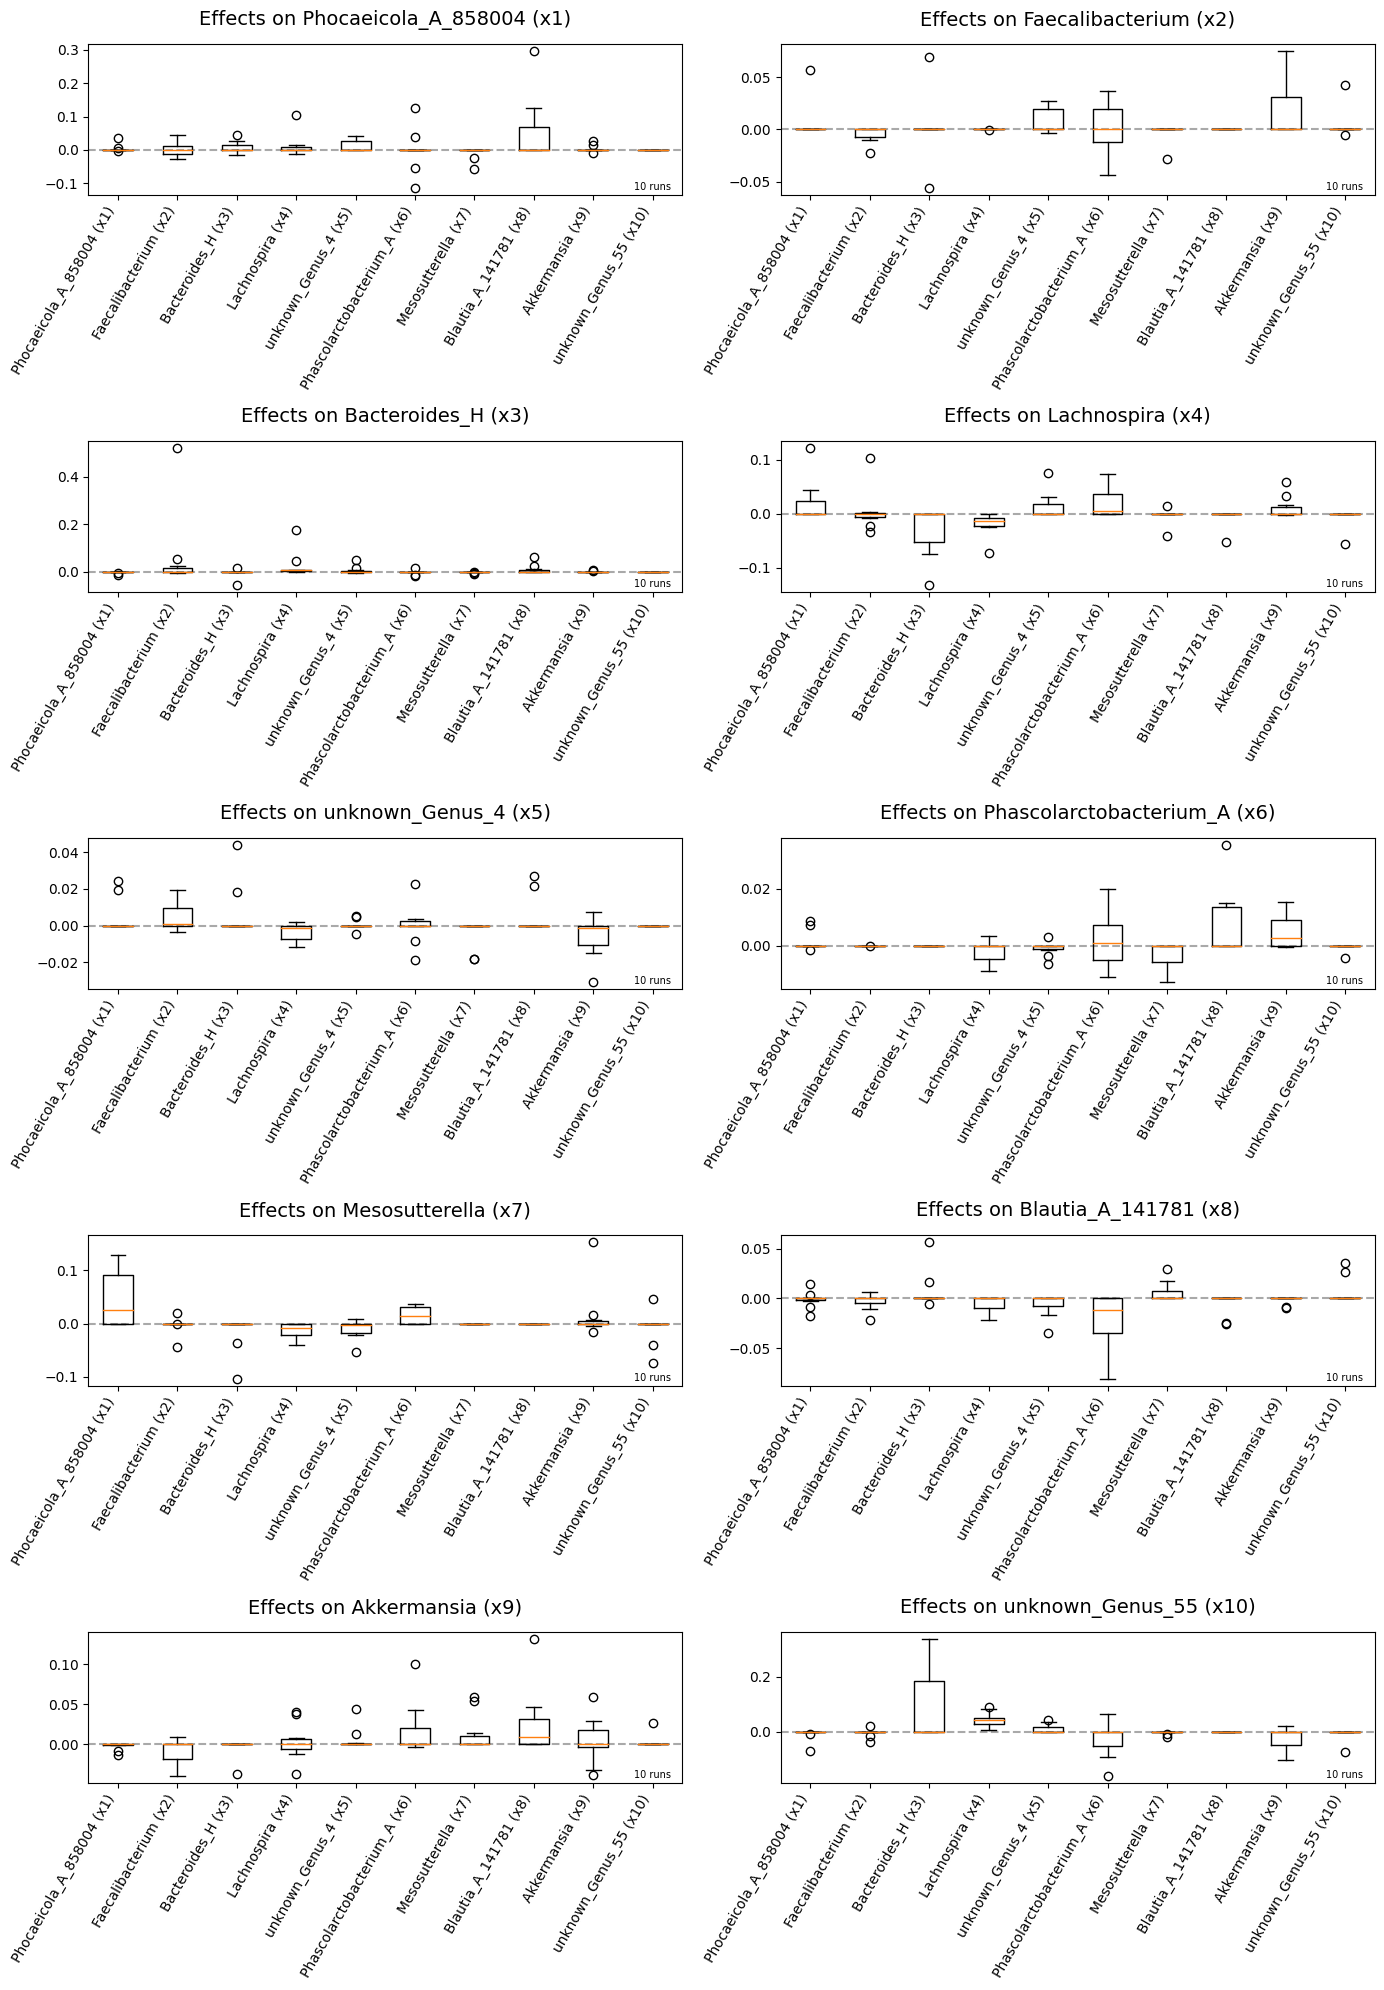

In [16]:
Mat = "effectsMat"
result = generate_boxplot_data(out_dir, Mat)
if result:
    coeffs, names, n = result
    n_col = 2
    n_row = math.ceil(n_taxa/n_col)
    fig, axs = plt.subplots(nrows=n_row, ncols=n_col, figsize=(7*n_col, 4* n_row))
    names = [f"{names[i]} (x{i+1})" for i in np.arange(len(names))]
    
    for i, ax in enumerate(axs.flat, start=0):
        if i > n_taxa:
            ax.axis('off')  # Turn off the axis for empty plots
        else:
            create_boxplot(ax, coeffs[i], f"Effects on {names[i]}", names)
            ax.text(0.98, 0.02, f'{n} runs', ha='right', va='bottom', fontsize=7, transform=ax.transAxes)

    plt.tight_layout()

### one variable and all mats in one plot

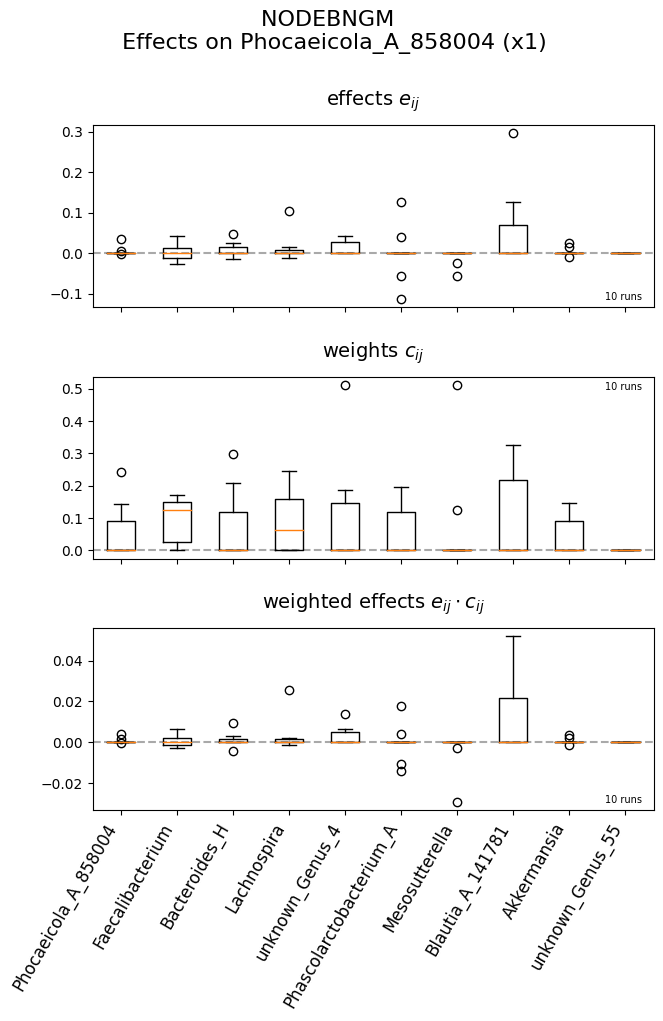

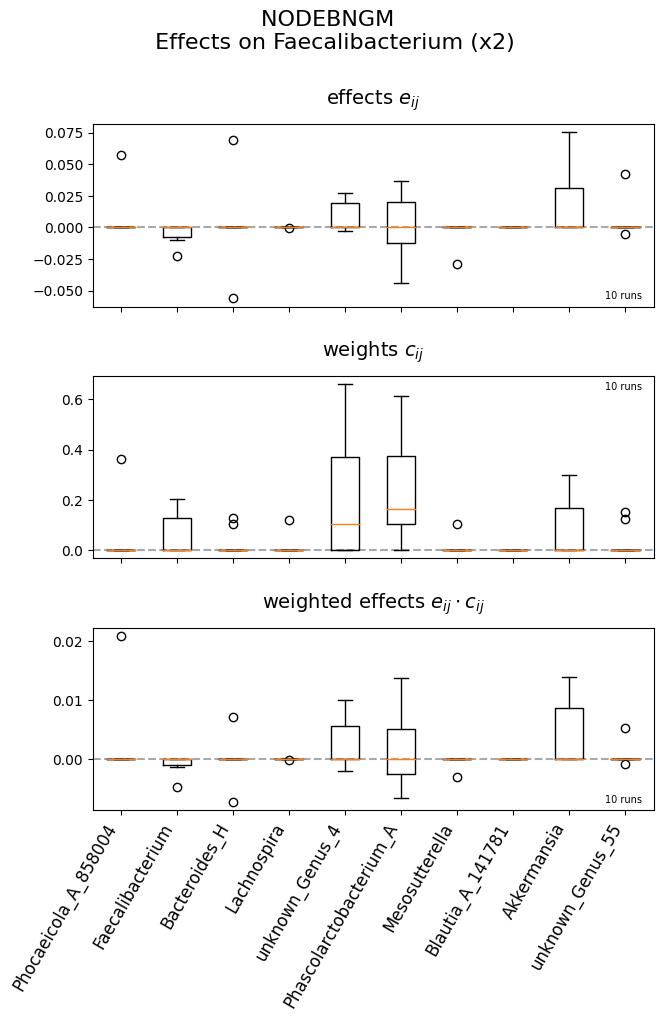

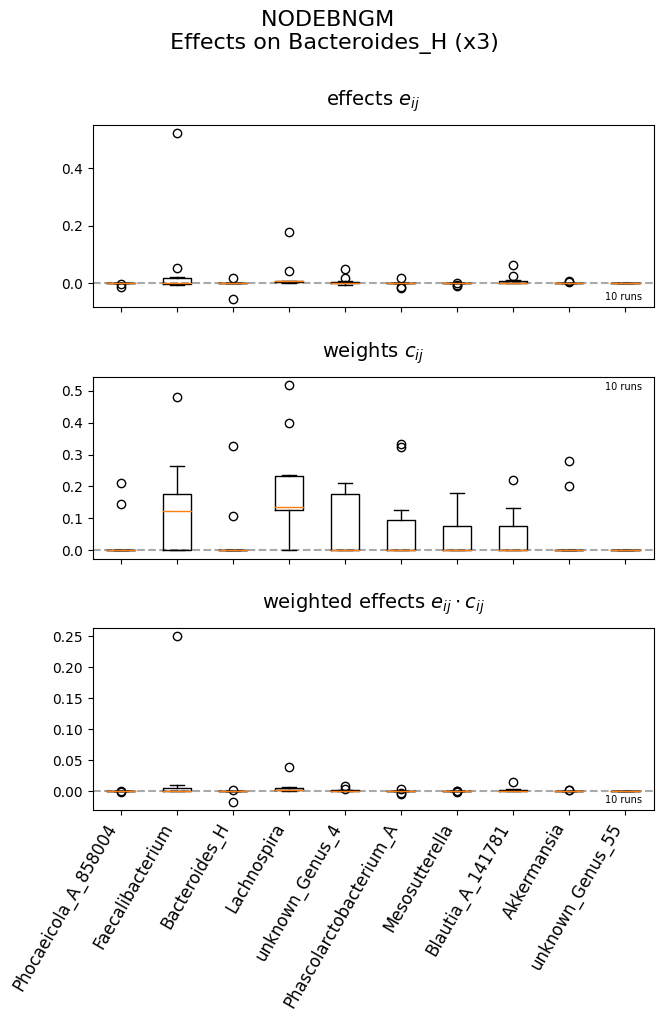

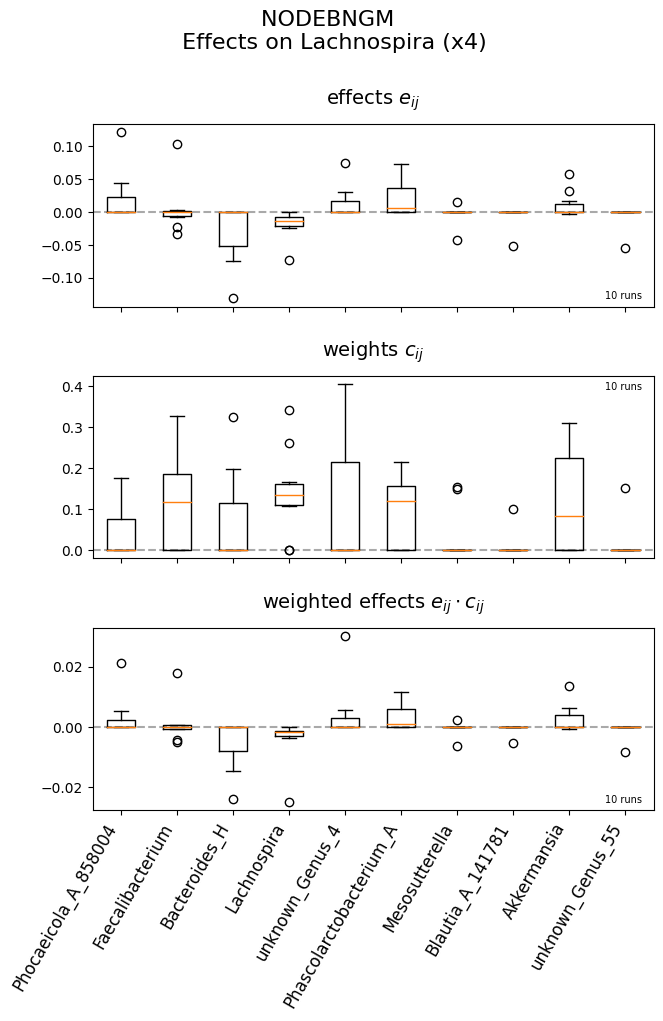

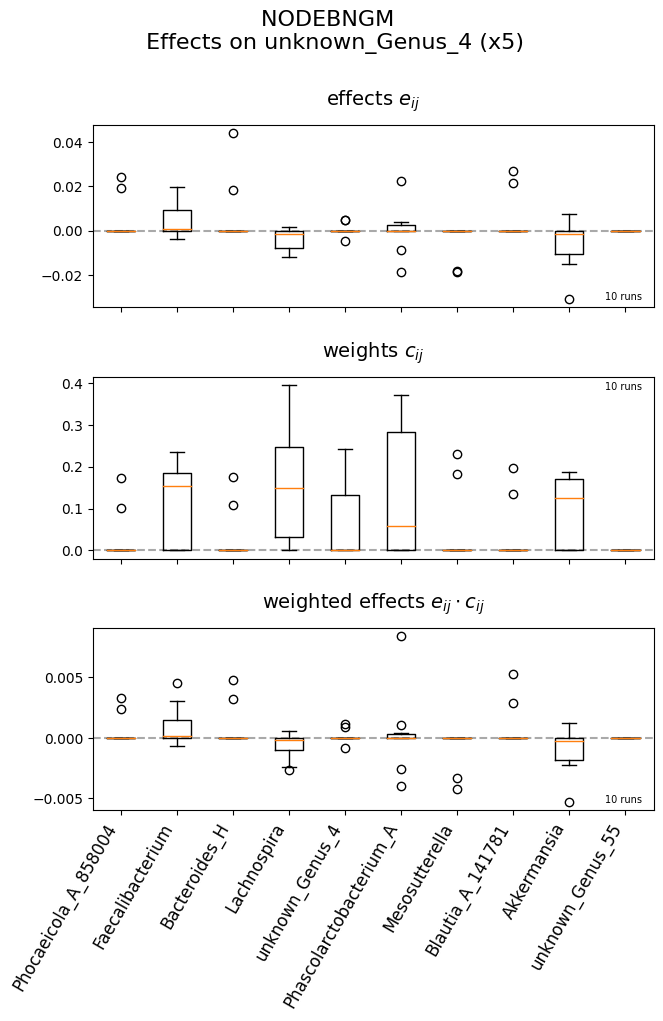

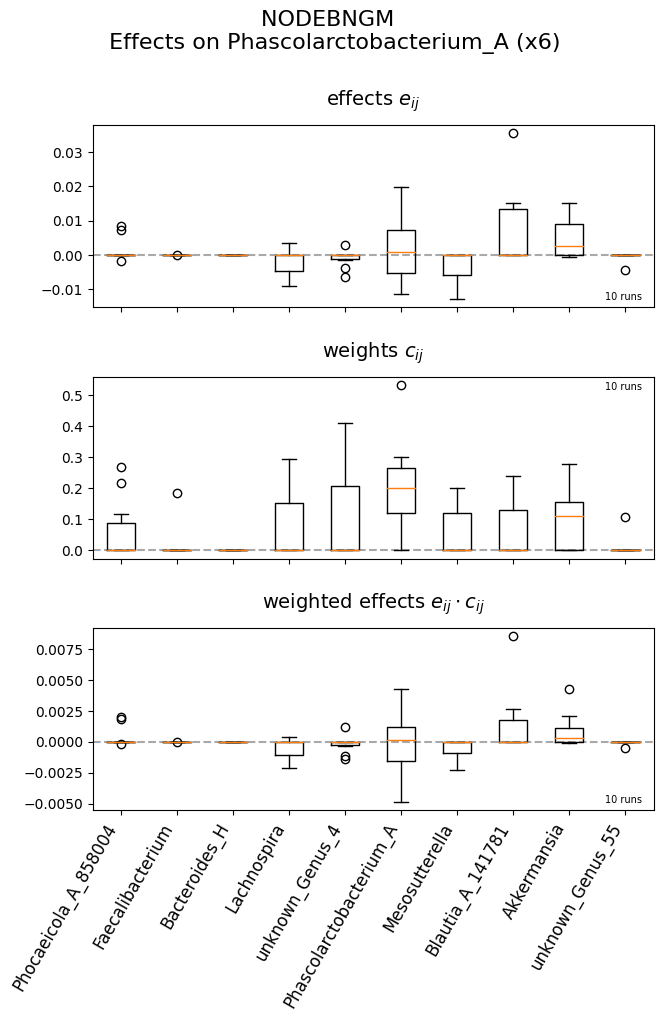

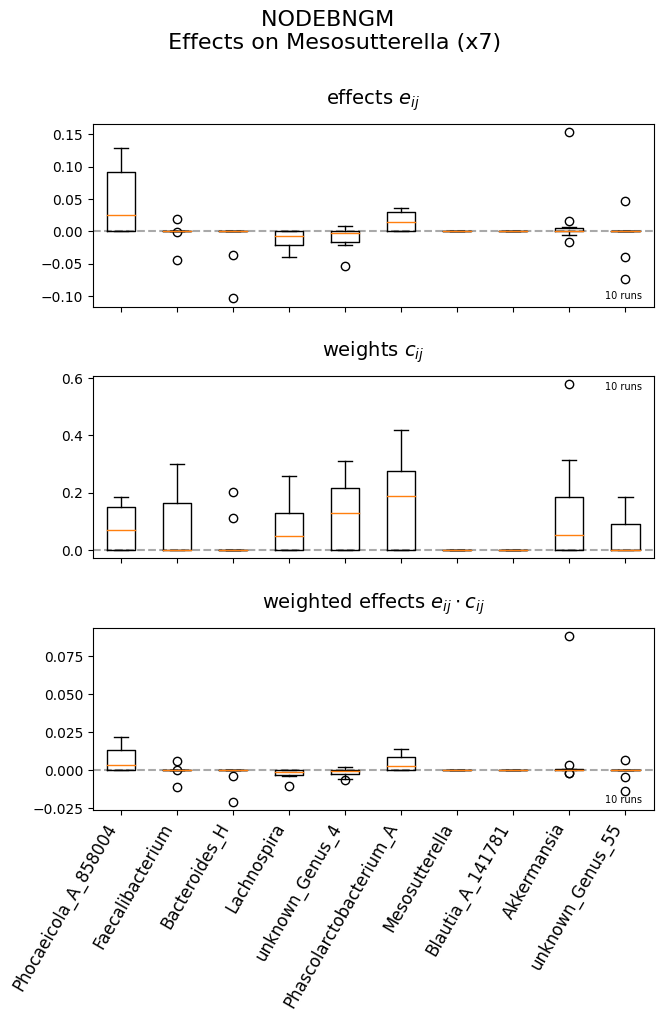

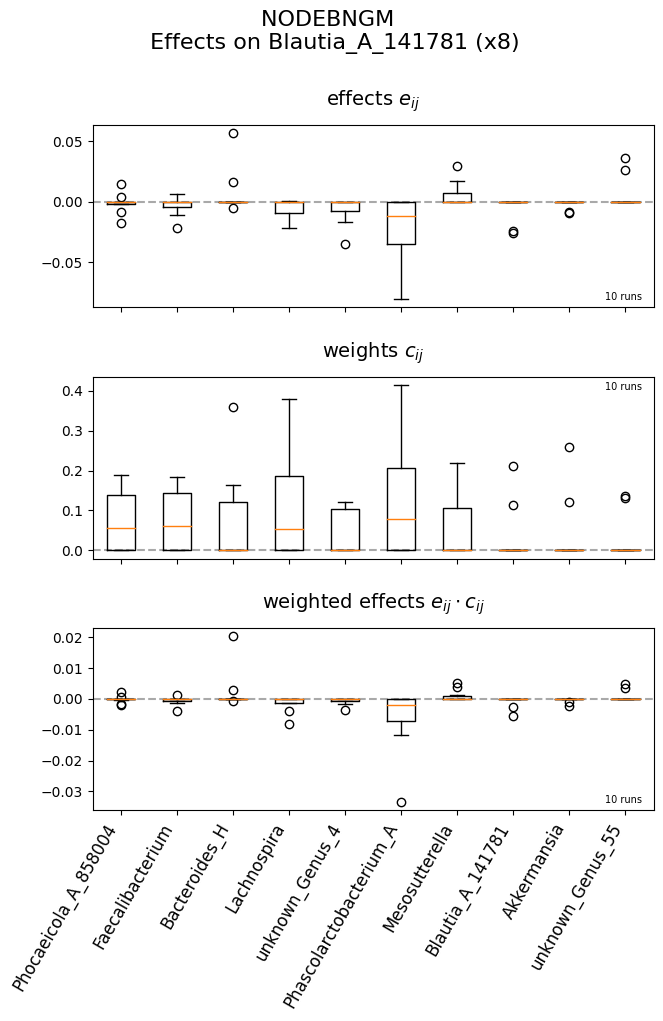

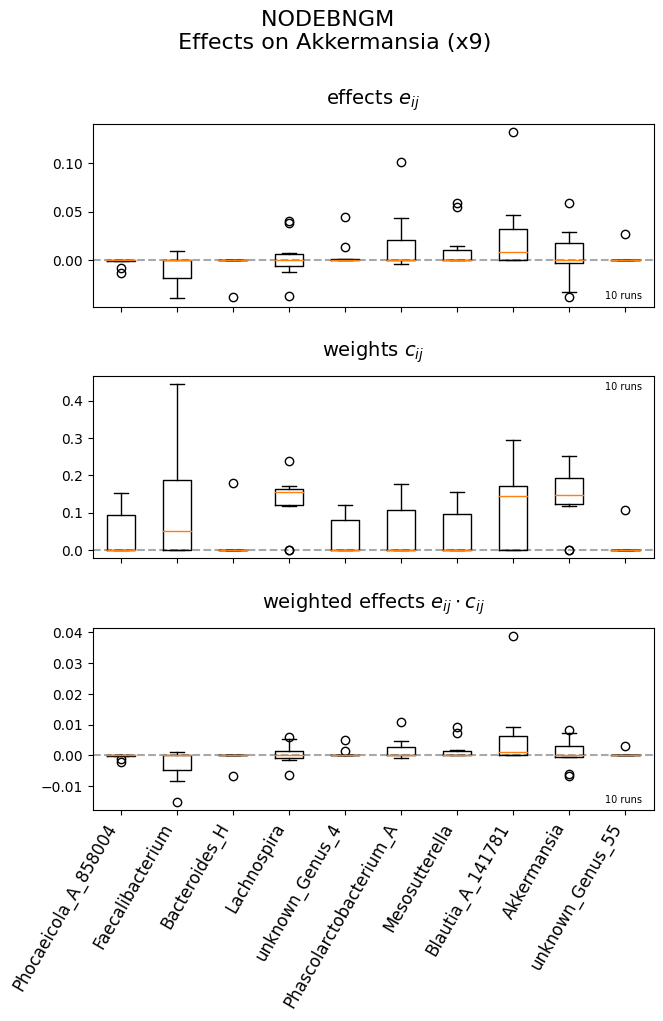

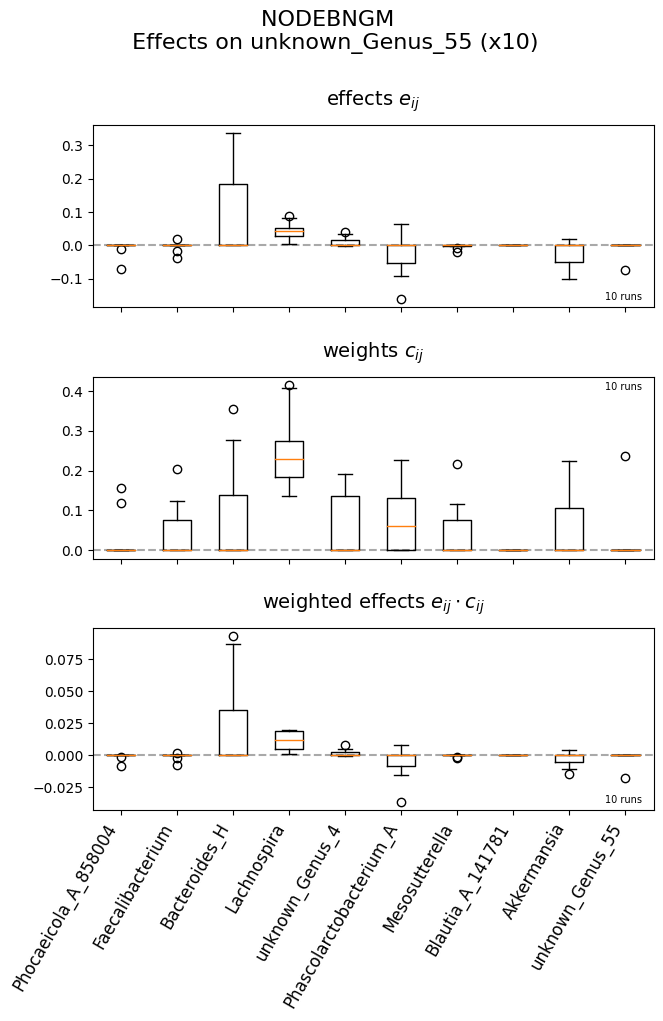

In [17]:
Mats = ["effectsMat", "weightsMat", "weighted_effectsMat"]

for taxon in np.arange(n_taxa):
    # taxon = 0

    n_col = 1
    n_row = len(Mats)
    fig, axs = plt.subplots(nrows=n_row, ncols=n_col, figsize=(7*n_col, 3.5* n_row))
                
    # iterate over matrices
    for i, ax in enumerate(axs.flat, start=0):
        Mat = Mats[i]
        result = generate_boxplot_data(out_dir, Mats[i])
        if result:
            coeffs, names, n = result
        
            create_boxplot(ax, coeffs[taxon], x_labels=names, set_x_labels=False) # , ylim=[-10,10]

    ax.set_xticklabels(names, rotation=60, ha="right", fontsize=12)

    # add text in right (bottom or top) corner with number of runs
    axs[0].text(0.98, 0.03, f'{n} runs', ha='right', va='bottom', fontsize=7, transform=axs[0].transAxes)
    axs[1].text(0.98, 0.97, f'{n} runs', ha='right', va='top', fontsize=7, transform=axs[1].transAxes)
    axs[2].text(0.98, 0.03, f'{n} runs', ha='right', va='bottom', fontsize=7, transform=axs[2].transAxes)

    # set titles
    fig.suptitle(f"NODEBNGM \n Effects on {names[taxon]} (x{taxon+1})", size = 16)
    axs[0].set_title(r'effects $e_{ij}$', fontsize = 14, pad = 14)
    axs[1].set_title(r'weights $c_{ij}$', fontsize = 14, pad = 14)
    axs[2].set_title(r'weighted effects $e_{ij} \cdot c_{ij}$', fontsize = 14, pad = 14)

    plt.tight_layout(pad = 2)

    plt.savefig(f"{plot_dir}/boxplot_NODEBNGM_allMats_allLibs_x{taxon+1}.pdf",
                bbox_inches='tight', dpi = 300)

## Plot fits NODEBNGM dataset runs 00-04

In [18]:
# for dataset in datasets:
dataset = "female_ALR"

out_dir = output_dir_node + "out_" + dataset + "/"

# get number of taxa
df = pd.read_csv(f'{out_dir}/out_{dataset}_run05/Names_xi.csv')
n_taxa = len(df.index)

# get list of available runs for the given dataset
runs = []
for file in [s for s in os.listdir(out_dir) if dataset in s]:
    m = re.search(r"run(\d{2})", file)
    if m:
        runs.append(m.group(1))

# limit number of runs that should be shown in the plot
runs = runs[0:6]

# specify dimensions of the plot
n_runs = len(runs)

# check if runs for these specifications are available
if n_runs > 0:

    # specify dimensions of the plot
    n_row = n_runs
    n_col = 4 # n_taxa

    # make plot
    fig, axs = plt.subplots(n_row, n_col)
    fig.set_figwidth(3.5*n_col)
    fig.set_figheight(2.5*n_row)
    fig.suptitle(dataset, y=1.0, fontsize = 16)
    fig.tight_layout(h_pad = 2)

    y = 0

    for run in runs:
        out_run = out_dir + "out_" + dataset + f"_run{run}"
        
        if os.path.exists(f"{out_run}/Yhat.csv"):
            # read data files
            df_pred = pd.read_csv(f"{out_run}/Yhat.csv", header=[0])
            df_data_obs = pd.read_csv(f"{out_run}/TS_{dataset}.csv", header=[0])

            # convert files to numpy array
            data_obs = np.array(df_data_obs)
            pred = np.array(df_pred)

            for taxon in np.arange(4): #n_taxa
                # make plot
                axs[int(y/n_col), (taxon)].plot(data_obs[:,0], data_obs[:,(taxon+1)], label = "data", linewidth = 0.7, color = colors[1])
                axs[int(y/n_col), (taxon)].plot(data_obs[:,0], pred[:,(taxon)], label = "fit")
                axs[int(y/n_col), (taxon)].set_xlabel("Time")
                # axs[int(y/n_col), (taxon)].set_ylim(-0.5, 12.5)

                axs[0, (taxon)].set_title(df_data_obs.columns[(taxon+1)])

                y += 1
            axs[int((y-taxon)/n_col), 0].annotate(f"run {run}", xy=(0, 0.5), 
                                                xytext=(-axs[int((y-taxon)/n_col), 0].yaxis.labelpad - 5, 0),
                                                xycoords=axs[int((y-taxon)/n_col), 0].yaxis.label, textcoords='offset points',
                                                size='large', ha='right', va='center')
            
            # add one legend for all polts (in the lower center)
            handles, labels = axs[0,0].get_legend_handles_labels()
            fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.03),
                        fancybox=True, shadow=False, ncol = 4, fontsize = 12)
            
    # save plots in one file
    plt.savefig(f'{plot_dir}/NODEBNGM_{dataset}_prediction_fits_x1-4_run0-5.pdf',
                bbox_inches='tight', dpi = 300)
    plt.close()